In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd 
import us
import seaborn as sns 
import statistics
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [3]:
%matplotlib inline

In [4]:
#Read in cleaned 2019 and 2021 Dataframes
clean_2019 = pd.read_csv('mydata/MMSA2019_Cleaned.csv')
clean_2021 = pd.read_csv('mydata/MMSA2021_Cleaned.csv')

In [5]:
#Recapture the categorical columns 

for column in clean_2019.columns:
    if column != 'STATE' and clean_2019[column].dtype == 'object':
        clean_2019[column] = clean_2019[column].astype('category')


for column in clean_2021.columns:
    if column != 'STATE' and clean_2021[column].dtype == 'object':
        clean_2021[column] = clean_2021[column].astype('category')

        
clean_2021['DISPCODE'] = clean_2021['DISPCODE'].astype('category')
clean_2019['DISPCODE'] = clean_2019['DISPCODE'].astype('category')

In [6]:
clean_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83666 entries, 0 to 83665
Data columns (total 97 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   DISPCODE  83666 non-null  category
 1   HHADULT   83666 non-null  float64 
 2   SEXVAR    83666 non-null  category
 3   GENHLTH   83666 non-null  category
 4   PHYSHLTH  83666 non-null  float64 
 5   MENTHLTH  83666 non-null  float64 
 6   _HLTHPLN  83666 non-null  category
 7   MEDCOST1  83666 non-null  category
 8   CHECKUP1  83666 non-null  category
 9   CVDINFR4  83666 non-null  category
 10  CVDCRHD4  83666 non-null  category
 11  CVDSTRK3  83666 non-null  category
 12  ASTHMA3   83666 non-null  category
 13  CHCSCNCR  83666 non-null  category
 14  CHCOCNCR  83666 non-null  category
 15  ADDEPEV3  83666 non-null  category
 16  CHCKDNY2  83666 non-null  category
 17  DIABETE4  83666 non-null  category
 18  MARITAL   83666 non-null  category
 19  EDUCA     83666 non-null  category
 20  RENTHO

In [7]:
clean_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104619 entries, 0 to 104618
Data columns (total 97 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   DISPCODE  104619 non-null  category
 1   HHADULT   104619 non-null  float64 
 2   SEXVAR    104619 non-null  category
 3   GENHLTH   104619 non-null  category
 4   PHYSHLTH  104619 non-null  float64 
 5   MENTHLTH  104619 non-null  float64 
 6   _HLTHPLN  104619 non-null  category
 7   MEDCOST1  104619 non-null  category
 8   CHECKUP1  104619 non-null  category
 9   CVDINFR4  104619 non-null  category
 10  CVDCRHD4  104619 non-null  category
 11  CVDSTRK3  104619 non-null  category
 12  ASTHMA3   104619 non-null  category
 13  CHCSCNCR  104619 non-null  category
 14  CHCOCNCR  104619 non-null  category
 15  ADDEPEV3  104619 non-null  category
 16  CHCKDNY2  104619 non-null  category
 17  DIABETE4  104619 non-null  category
 18  MARITAL   104619 non-null  category
 19  EDUCA     104619 non-nu

In [8]:
#Numerical columns for 2019 df
num_cols = list(clean_2019.select_dtypes(include=('float','int')).columns)
exclusions = ['_MMSA','_MMSAWT','_STSTR']
num_cols = [item for item in num_cols if item not in exclusions]

In [9]:
#Numerical columns for 2021 df
num_cols = list(clean_2021.select_dtypes(include=('float','int')).columns)
exclusions = ['_MMSA','_MMSAWT','_STSTR']
num_cols = [item for item in num_cols if item not in exclusions]

In [10]:
#Categorical Columns for 2019 df
cat_cols = clean_2019.select_dtypes(exclude=('float','int')).columns

In [11]:
#Categorical Columns for 2021 df
cat_cols = clean_2021.select_dtypes(exclude=('float','int')).columns

### EXPLORATORY DATA ANALYSIS

In [12]:
clean_2019[num_cols].describe([0.25,0.50,0.75,0.99]).T

,count,mean,std,min,25%,50%,75%,99%,max
HHADULT,83666.0,2.130674,1.075550,1.0000,1.0000,2.000000,2.000000,5.0000,33.0000
PHYSHLTH,83666.0,3.915928,8.248362,0.0000,0.0000,0.000000,3.000000,30.0000,30.0000
MENTHLTH,83666.0,4.087730,8.063345,0.0000,0.0000,0.000000,4.000000,30.0000,30.0000
CPDEMO1B,83666.0,1.111192,0.422130,0.0000,1.0000,1.000000,1.000000,3.0000,6.0000
CHILDREN,83666.0,0.623634,1.094482,0.0000,0.0000,0.000000,1.000000,4.0000,15.0000
WEIGHT2,83666.0,183.360136,46.512572,69.0000,150.0000,178.000000,210.000000,325.0000,610.0000
HEIGHT3,83666.0,1.709740,0.105615,0.9144,1.6256,1.701800,1.778000,1.9304,2.3876
_AGE80,83666.0,49.913501,16.839663,18.0000,36.0000,51.000000,63.000000,80.0000,80.0000
WTKG3,83666.0,83.170464,21.097946,31.3000,68.0400,80.740000,95.250000,147.4200,276.6900
_BMI5,83666.0,28.385627,6.465042,12.0500,24.0200,27.320000,31.480000,49.3470,94.2600


In [13]:
clean_2021[num_cols].describe([0.25,0.50,0.75,0.99]).T

,count,mean,std,min,25%,50%,75%,99%,max
HHADULT,104619.0,2.168507,1.062907,1.0000,2.0000,2.000000,3.000000,5.0000,32.000
PHYSHLTH,104619.0,3.293350,7.642019,0.0000,0.0000,0.000000,2.000000,30.0000,30.000
MENTHLTH,104619.0,4.375792,8.138631,0.0000,0.0000,0.000000,5.000000,30.0000,30.000
CPDEMO1B,104619.0,1.105239,0.418503,0.0000,1.0000,1.000000,1.000000,3.0000,6.000
CHILDREN,104619.0,0.619859,1.077064,0.0000,0.0000,0.000000,1.000000,4.0000,21.000
WEIGHT2,104619.0,185.173608,46.700997,59.0000,150.0000,180.000000,210.000000,325.0000,630.000
HEIGHT3,104619.0,1.711756,0.105203,0.9144,1.6256,1.701800,1.781937,1.9304,2.413
_AGE80,104619.0,50.032480,16.409673,18.0000,37.0000,51.000000,63.000000,80.0000,80.000
WTKG3,104619.0,83.993054,21.183432,26.7600,68.0400,81.650000,95.250000,147.4200,285.760
_BMI5,104619.0,28.612459,6.524488,12.1600,24.2100,27.440000,31.750000,49.5100,99.330


In [14]:
# Replace outliers with the 99 percentile value except weighted and Identification columns

#2019
for i in num_cols:
    percentile_99 = np.percentile(clean_2019[i], 99)
    clean_2019.loc[clean_2019[i] > percentile_99, i] = percentile_99
    
#2021
for i in num_cols:
    percentile_99 = np.percentile(clean_2021[i], 99)
    clean_2021.loc[clean_2021[i] > percentile_99, i] = percentile_99

In [15]:
clean_2019[num_cols].describe([0.25,0.50,0.75,0.99]).T

,count,mean,std,min,25%,50%,75%,99%,max
HHADULT,83666.0,2.111551,0.982801,1.0000,1.0000,2.000000,2.000000,5.00000,5.0000
PHYSHLTH,83666.0,3.915928,8.248362,0.0000,0.0000,0.000000,3.000000,30.00000,30.0000
MENTHLTH,83666.0,4.087730,8.063345,0.0000,0.0000,0.000000,4.000000,30.00000,30.0000
CPDEMO1B,83666.0,1.102096,0.358218,0.0000,1.0000,1.000000,1.000000,3.00000,3.0000
CHILDREN,83666.0,0.609555,1.033060,0.0000,0.0000,0.000000,1.000000,4.00000,4.0000
WEIGHT2,83666.0,182.962045,44.910876,69.0000,150.0000,178.000000,210.000000,325.00000,325.0000
HEIGHT3,83666.0,1.709251,0.104388,0.9144,1.6256,1.701800,1.778000,1.93040,1.9304
_AGE80,83666.0,49.913501,16.839663,18.0000,36.0000,51.000000,63.000000,80.00000,80.0000
WTKG3,83666.0,82.989908,20.371472,31.3000,68.0400,80.740000,95.250000,147.42000,147.4200
_BMI5,83666.0,28.324746,6.197539,12.0500,24.0200,27.320000,31.480000,49.34245,49.3470


In [16]:
clean_2021[num_cols].describe([0.25,0.50,0.75,0.99]).T

,count,mean,std,min,25%,50%,75%,99%,max
HHADULT,104619.0,2.148596,0.962734,1.0000,2.0000,2.000000,3.000000,5.000000,5.0000
PHYSHLTH,104619.0,3.293350,7.642019,0.0000,0.0000,0.000000,2.000000,30.000000,30.0000
MENTHLTH,104619.0,4.375792,8.138631,0.0000,0.0000,0.000000,5.000000,30.000000,30.0000
CPDEMO1B,104619.0,1.095738,0.348349,0.0000,1.0000,1.000000,1.000000,3.000000,3.0000
CHILDREN,104619.0,0.607003,1.019102,0.0000,0.0000,0.000000,1.000000,4.000000,4.0000
WEIGHT2,104619.0,184.759000,45.048916,59.0000,150.0000,180.000000,210.000000,325.000000,325.0000
HEIGHT3,104619.0,1.711294,0.104043,0.9144,1.6256,1.701800,1.781937,1.930400,1.9304
_AGE80,104619.0,50.032480,16.409673,18.0000,37.0000,51.000000,63.000000,80.000000,80.0000
WTKG3,104619.0,83.805004,20.434098,26.7600,68.0400,81.650000,95.250000,147.420000,147.4200
_BMI5,104619.0,28.548437,6.238817,12.1600,24.2100,27.440000,31.750000,49.510000,49.5100


<Axes: >

<Figure size 1200x800 with 0 Axes>

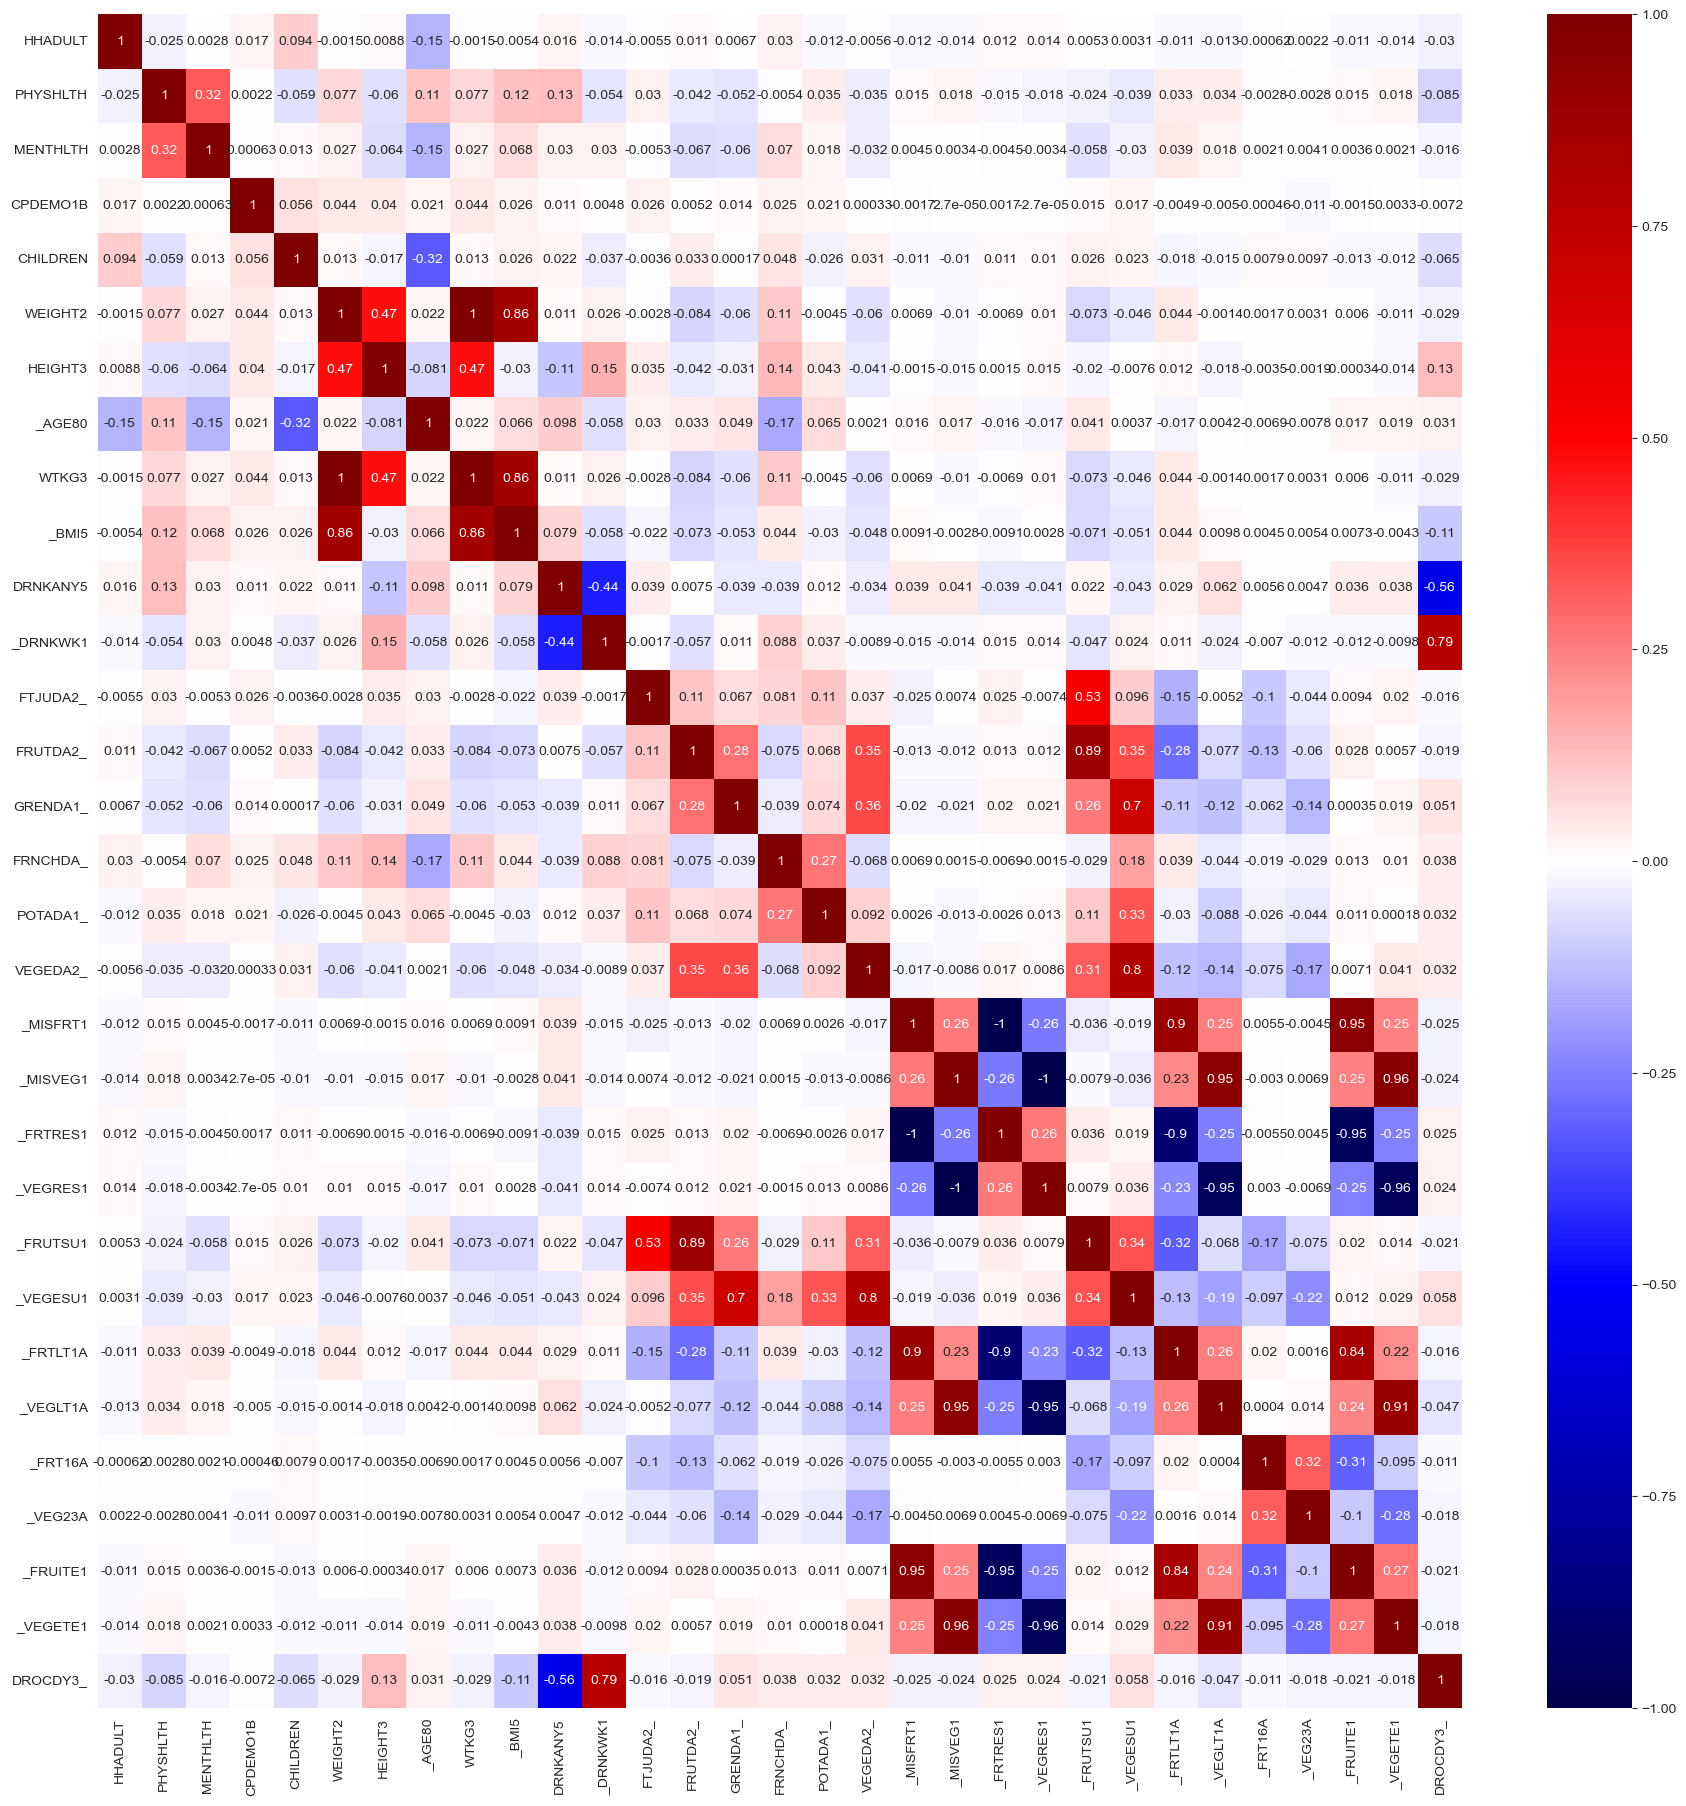

In [17]:
#Check for correlation between the numeric vairbales 
#2019
plt.figure(figsize=(12,8))
plt.figure(figsize=(22,22))
sns.set_style('darkgrid')
sns.heatmap(clean_2019[num_cols].corr(),cmap='seismic',annot=True)

<Axes: >

<Figure size 1200x800 with 0 Axes>

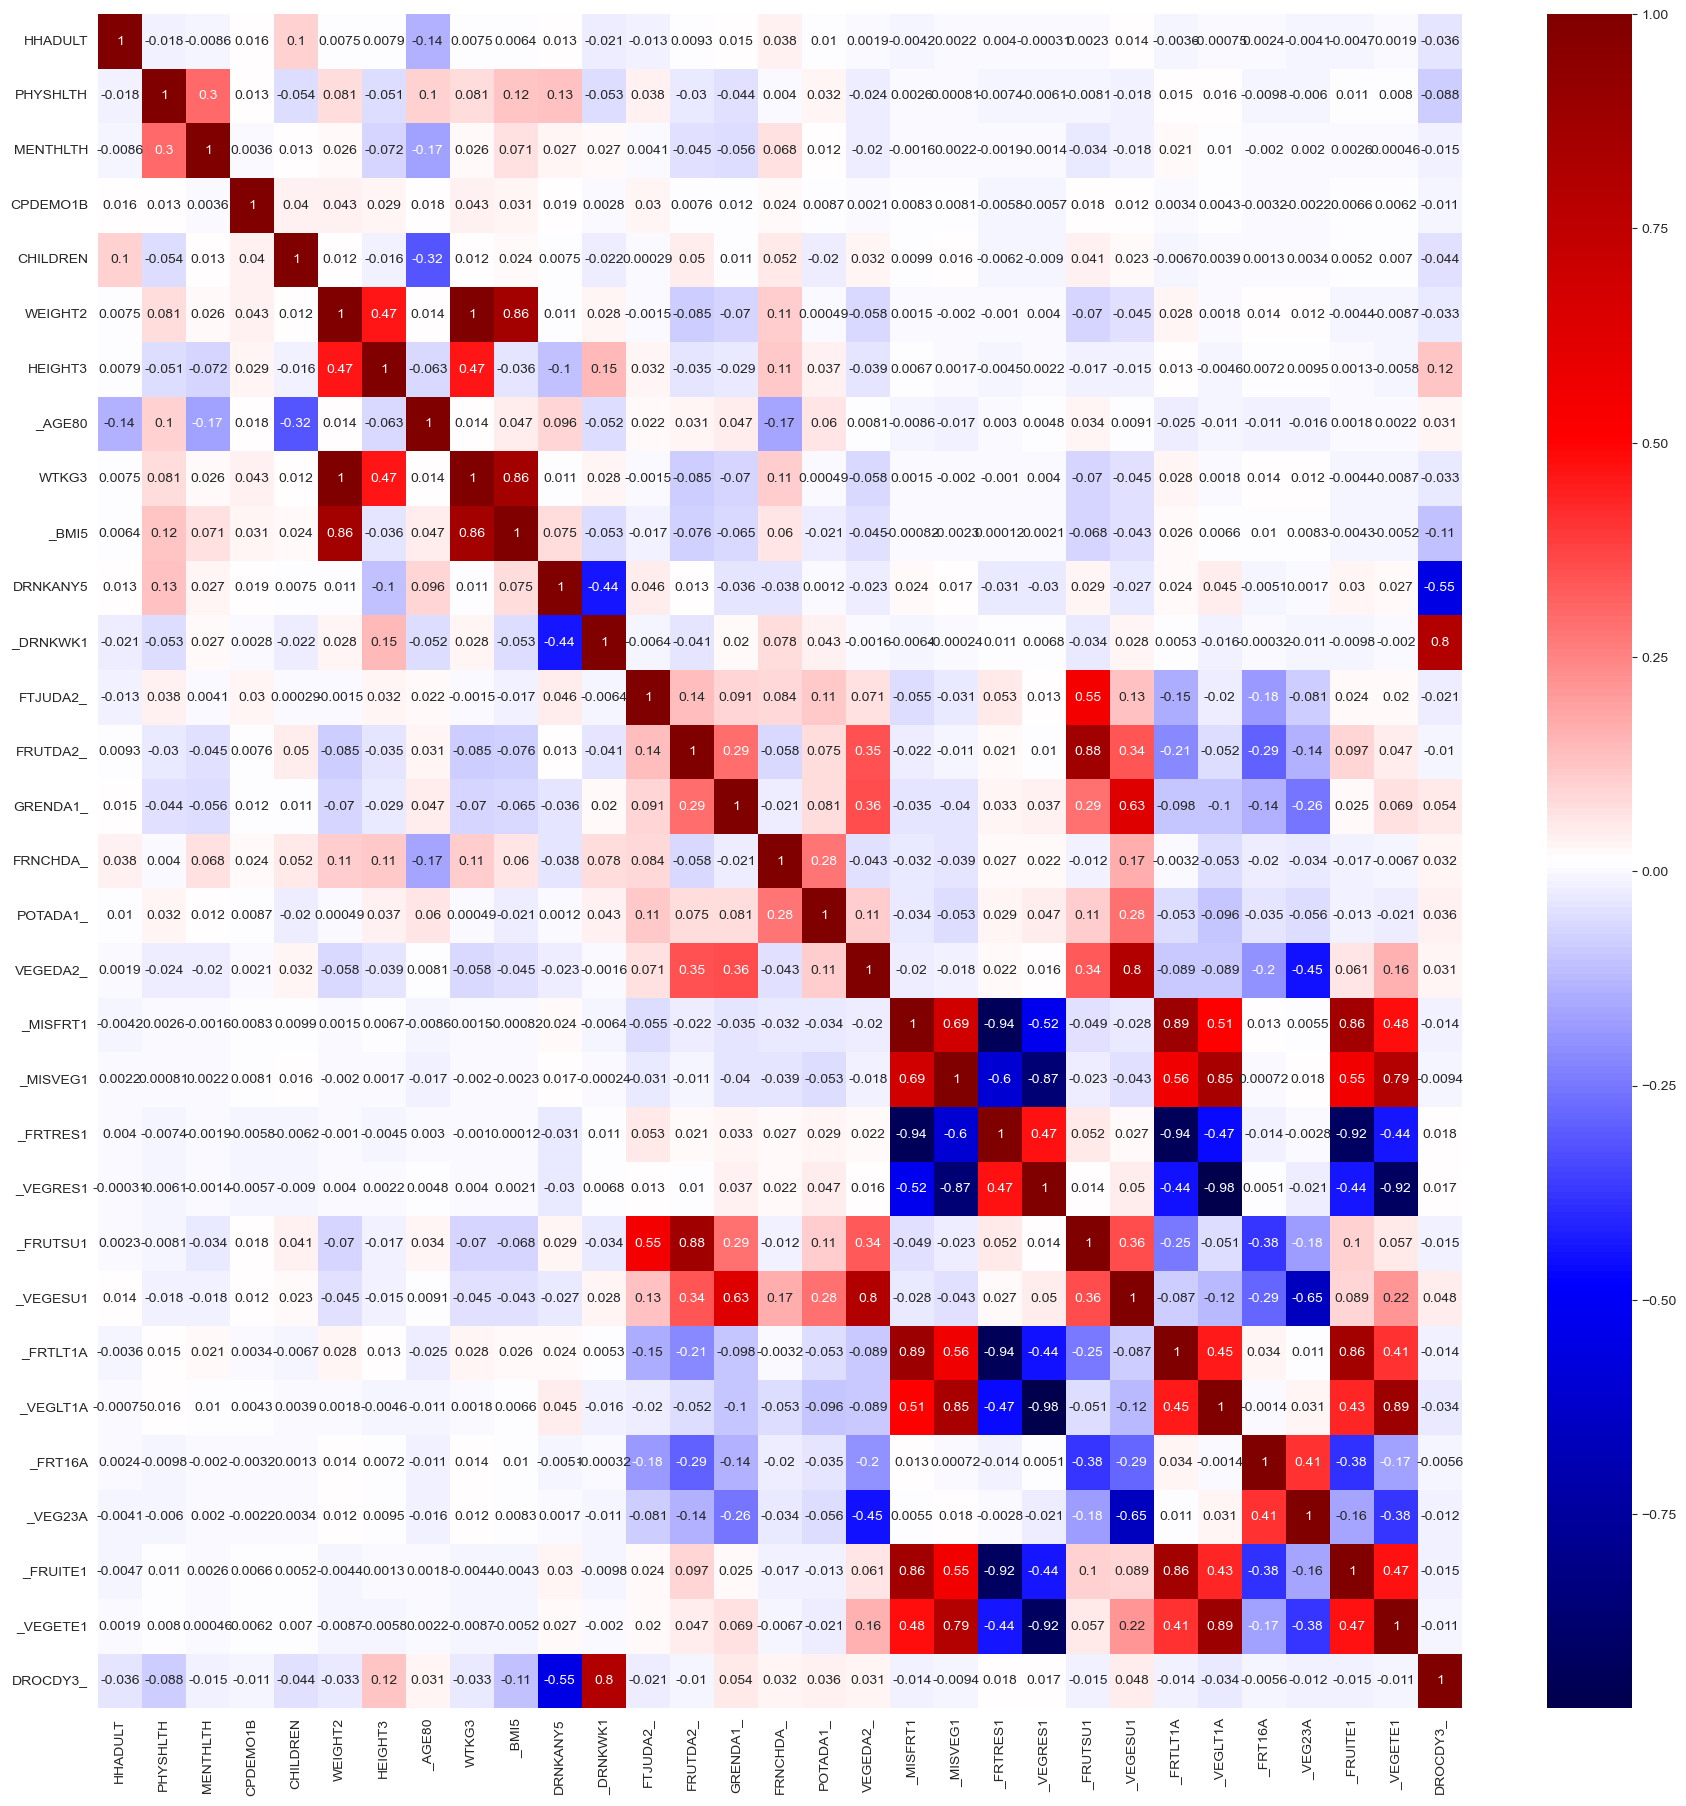

In [18]:
#Check for correlation between the numeric vairbales 
#2021
plt.figure(figsize=(12,8))
plt.figure(figsize=(22,22))
sns.set_style('darkgrid')
sns.heatmap(clean_2021[num_cols].corr(),cmap='seismic',annot=True)

----

- We can see the presence of significant multicolinearity 

- To Address this issue we will drop some columns to reduce multicolinearity

In [19]:
#Extracting the Numeric columns that are highly correlated in 2019 dataset

corr_matrix = clean_2019[num_cols].corr()

upper_tri = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape), k=0).astype(bool))

# Find index and column name where correlation values are greater than 0.8
high_corr_pairs = [(column, index, upper_tri.loc[index, column])
                   for column in upper_tri.columns for index in upper_tri.index
                   if abs(upper_tri.loc[index, column]) > 0.8 and upper_tri.loc[index, column] != 1]

# Convert to a DataFrame for nicer display
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Variable 1', 'Variable 2', 'Correlation'])
high_corr_df

,Variable 1,Variable 2,Correlation
0,WTKG3,WEIGHT2,1.000000
1,_BMI5,WEIGHT2,0.857836
2,_BMI5,WTKG3,0.857837
3,_FRTRES1,_MISFRT1,-1.000000
4,_VEGRES1,_MISVEG1,-1.000000
5,_FRUTSU1,FRUTDA2_,0.888033
6,_FRTLT1A,_MISFRT1,0.895299
7,_FRTLT1A,_FRTRES1,-0.895299
8,_VEGLT1A,_MISVEG1,0.948269
9,_VEGLT1A,_VEGRES1,-0.948269


In [20]:
#Extracting the Numeric columns that are highly correlated in 2021 dataset
corr_matrix = clean_2021[num_cols].corr()

upper_tri = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape), k=0).astype(bool))

# Find index and column name where correlation values are greater than 0.8
high_corr_pairs = [(column, index, upper_tri.loc[index, column])
                   for column in upper_tri.columns for index in upper_tri.index
                   if abs(upper_tri.loc[index, column]) > 0.8 and upper_tri.loc[index, column] != 1]

# Convert to a DataFrame for nicer display
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Variable 1', 'Variable 2', 'Correlation'])
high_corr_df

,Variable 1,Variable 2,Correlation
0,WTKG3,WEIGHT2,1.000000
1,_BMI5,WEIGHT2,0.857989
2,_BMI5,WTKG3,0.857991
3,_FRTRES1,_MISFRT1,-0.941432
4,_VEGRES1,_MISVEG1,-0.865866
5,_FRUTSU1,FRUTDA2_,0.875212
6,_VEGESU1,VEGEDA2_,0.800083
7,_FRTLT1A,_MISFRT1,0.887441
8,_FRTLT1A,_FRTRES1,-0.942651
9,_VEGLT1A,_MISVEG1,0.845302


In [56]:
#Handle the numeric variables that are too highly correlated which may affect by logistic regression model

,WTKG3,WEIGHT2
0,81.65,180.0
1,120.20,265.0
2,77.11,170.0
3,127.01,280.0
4,122.47,270.0
...,...,...
83661,113.40,250.0
83662,72.57,160.0
83663,41.73,92.0
83664,61.23,135.0


In [21]:
#Export df's without outliers
clean_2019.to_csv('mydata/MMSA2019_Cleaned_2.csv', index=False)
clean_2021.to_csv('mydata/MMSA2021_Cleaned_2.csv', index=False)

---

# Research Questions

### #1 How do dietary habits, specifically the consumption of fruits and dark green vegetables, relate to overall health outcomes and perceived health predictions? 

A) We will compare the daily dark Vegetable Consumption between individuals with percieved good health Vs percieved bad health using statistical testing

B) We will compare the daily fruit Consumption between individuals with percieved good health Vs percieved bad health using statistical testing. 

C) Do F&V when consumed in quantities around 800 grams per day—roughly five servings daily, exhibit potent preventive effects against CVDs?


NB: (we will exclude fruit juice as it is known that fruit juice lacks fibre and is high in sugar. We will also be using both 2019 and 2021 data to answer these questions)


In [22]:
#(Fruits and Vegetable columns)
fv_cols= ['FTJUDA2_','FRUTDA2_','GRENDA1_','FRNCHDA_','POTADA1_','VEGEDA2_',
                       '_MISFRT1','_MISVEG1','_FRTRES1','_VEGRES1','_FRUTSU1','_VEGESU1',
                       '_FRTLT1A','_VEGLT1A','_FRT16A','_VEG23A','_FRUITE1','_VEGETE1']

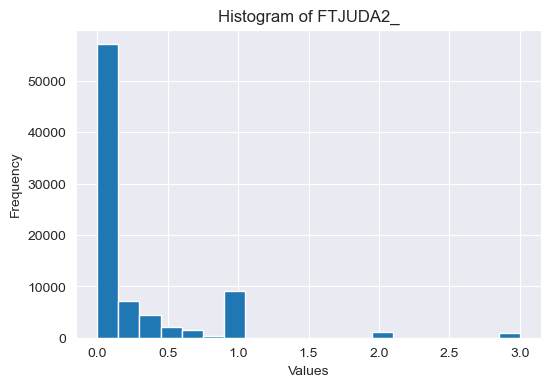

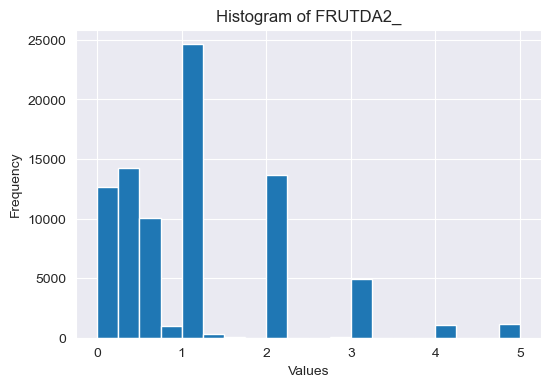

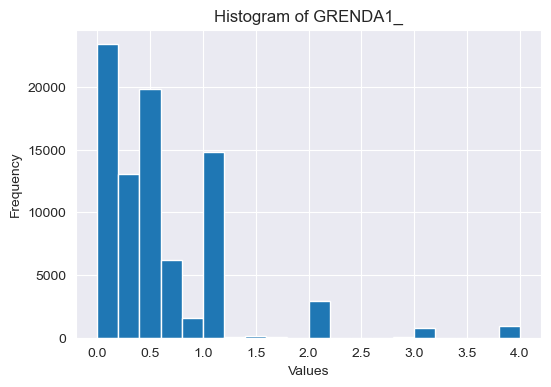

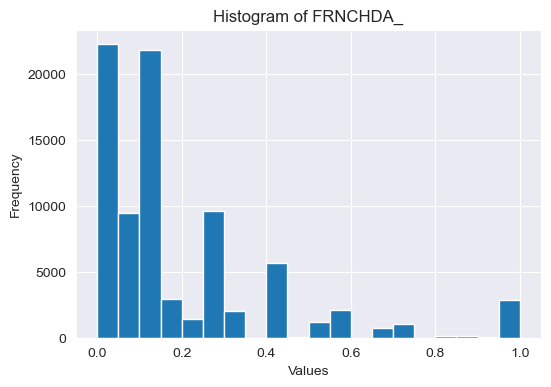

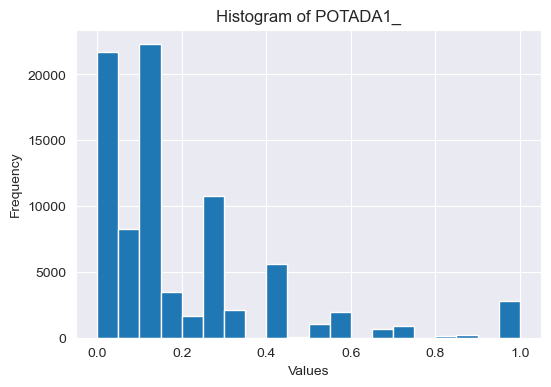

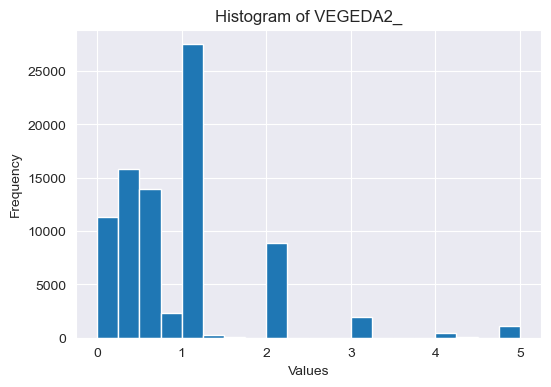

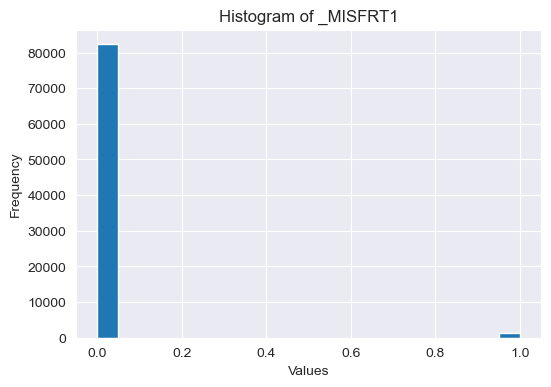

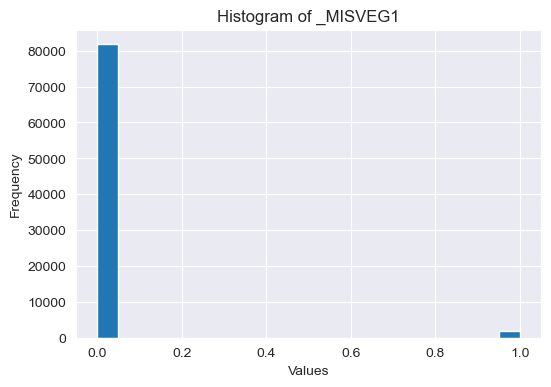

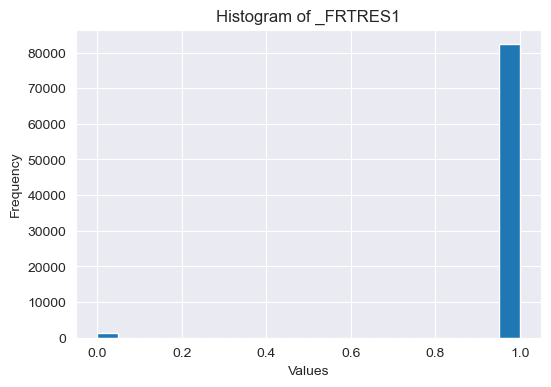

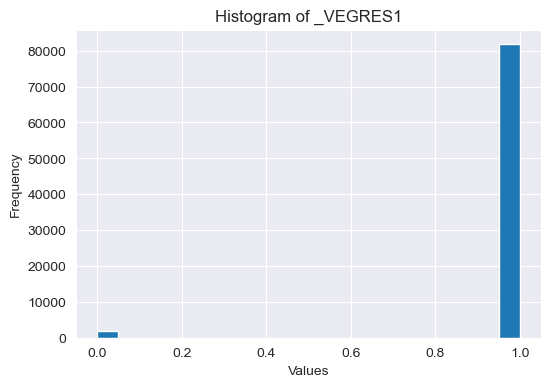

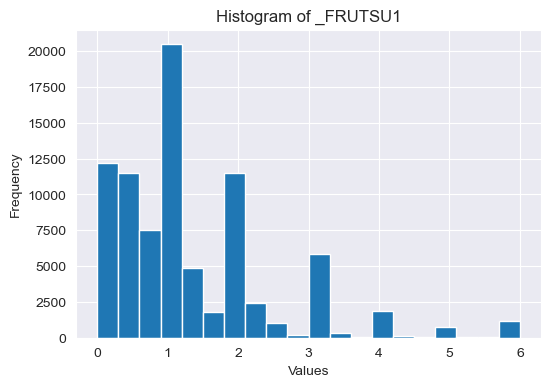

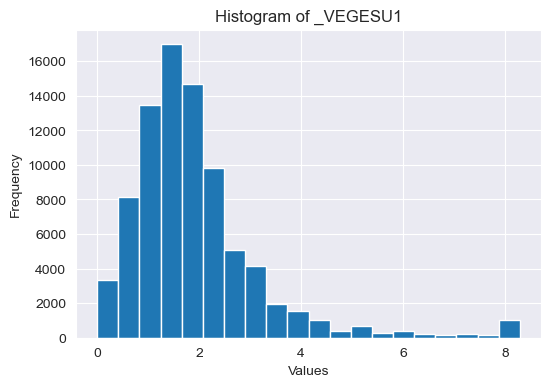

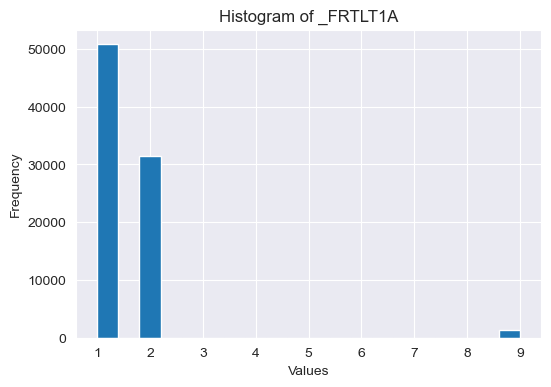

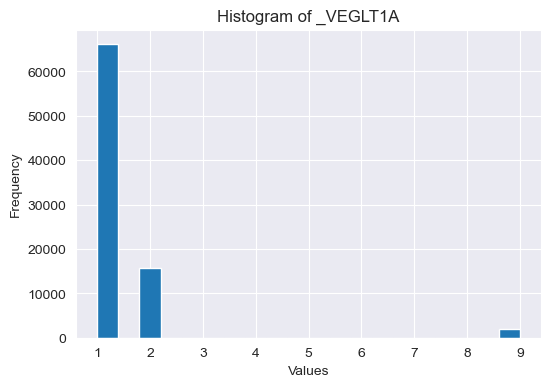

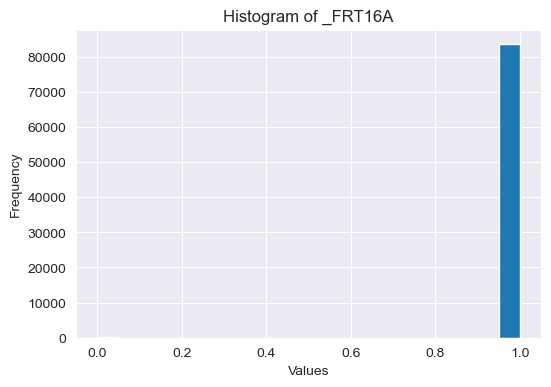

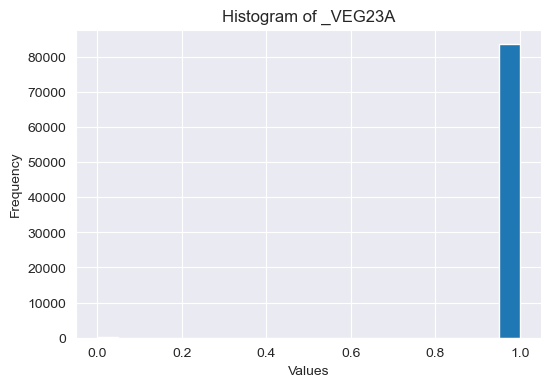

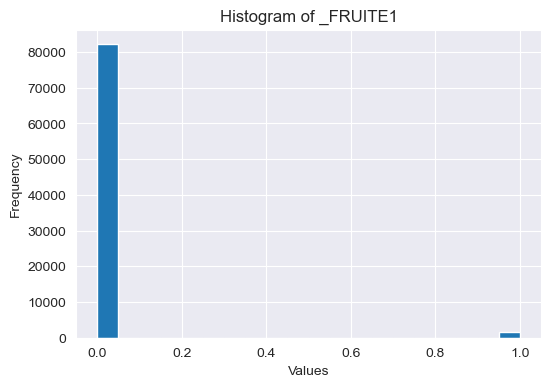

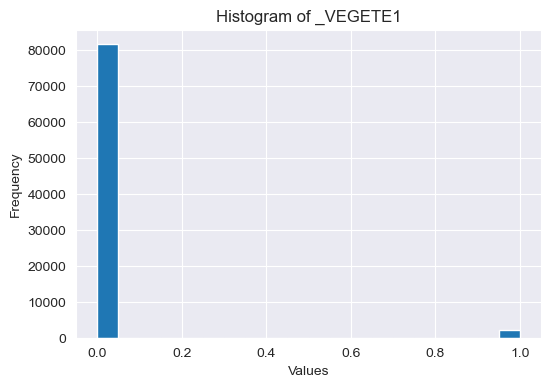

In [23]:
# Loop through the fruit and vegetable columns and plot histograms
for column in fv_cols:
    plt.figure(figsize=(6, 4))  # Set figure size for each histogram
    plt.hist(clean_2019[column], bins=20)  # Assuming clean_2019 is the DataFrame
    plt.title(f'Histogram of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()  # Show each histogram individually

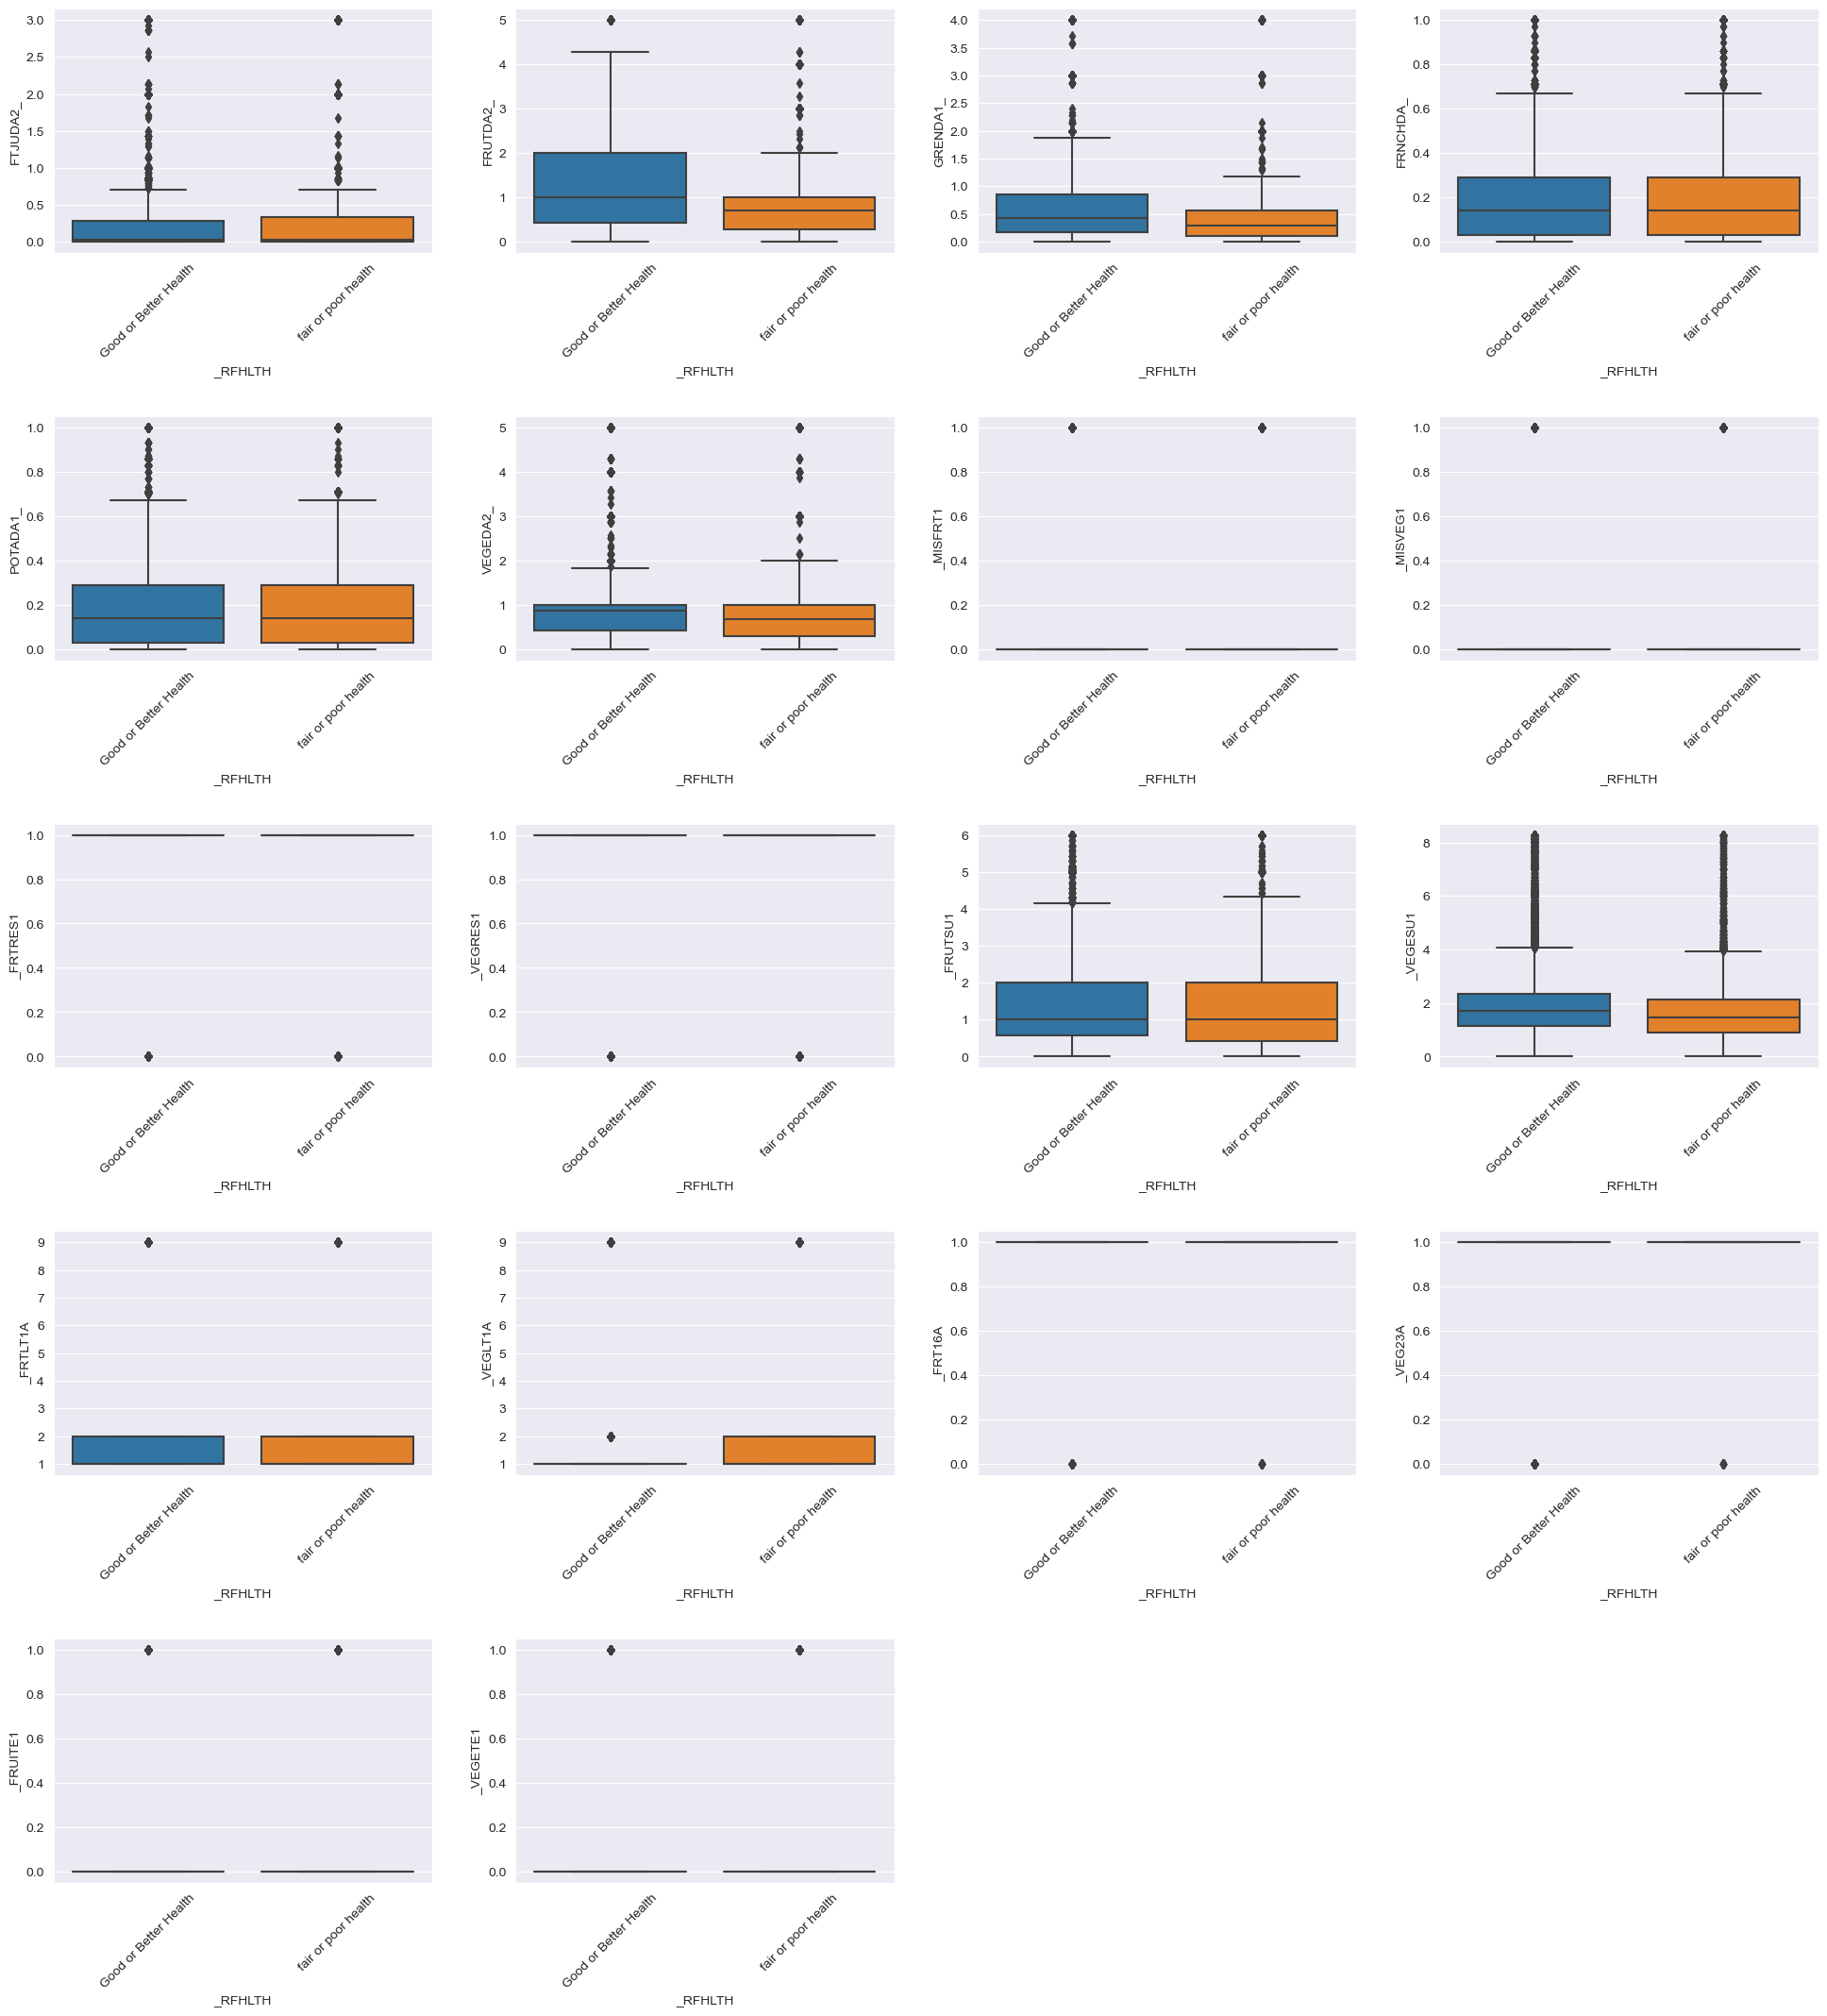

In [24]:
# Create a boxplot for each fruit and vegetable variable against the categorical target variable(_RFHLTH)

#2019
plt.figure(figsize=(20,25))
for i,j in zip(fv_cols, range(len(fv_cols))):
    plt.subplot(6,4,j+1)
    plt.xticks(rotation=45)
    sns.boxplot(data=clean_2019, x='_RFHLTH', y=i)
plt.tight_layout(pad=3.0)  

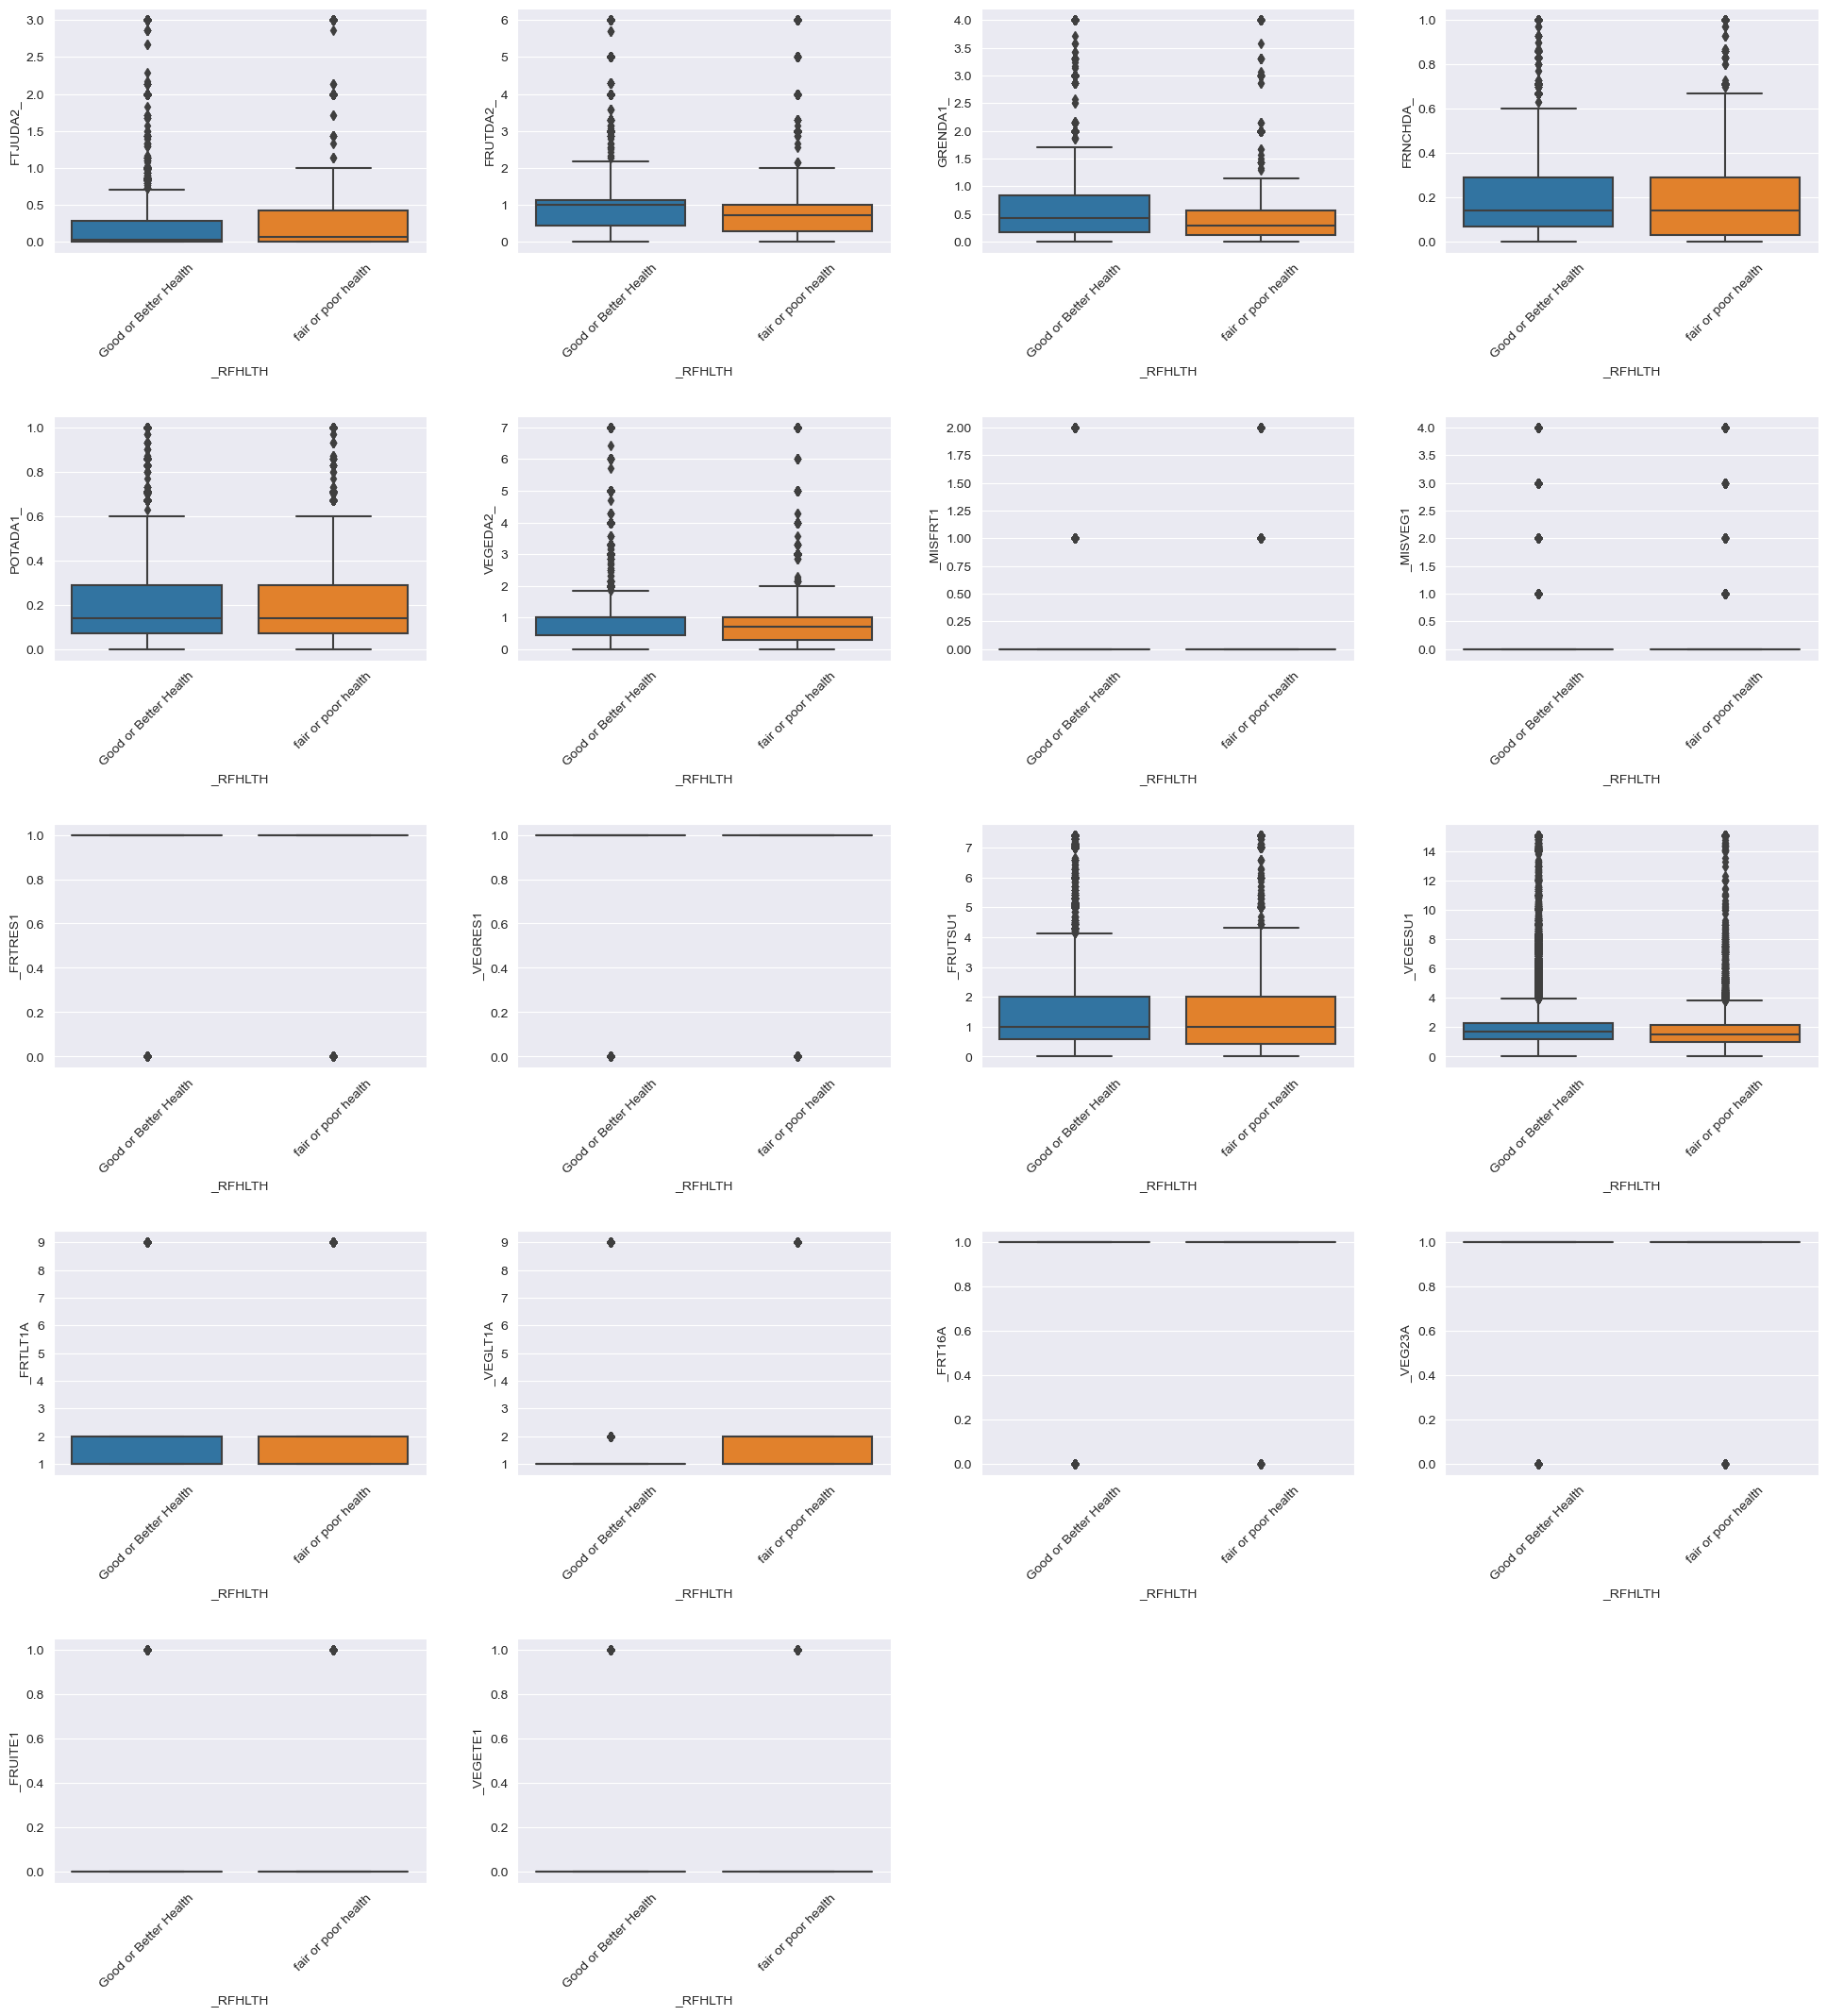

In [25]:
# Create a boxplot for each fruit and vegetable variable against the categorical target variable(_RFHLTH)

#2021
plt.figure(figsize=(20,25))
for i,j in zip(fv_cols, range(len(fv_cols))):
    plt.subplot(6,4,j+1)
    plt.xticks(rotation=45)
    sns.boxplot(data=clean_2021, x='_RFHLTH', y=i)
plt.tight_layout(pad=3.0) 

#### A) Comparing vegetable consumption of those with percieved good health versus those with percieved bad health
* Assumptions: Due to large datset we will assume a normal distribution 

In [26]:
#Function for statistical significance
def categorize_significance(p_value):
    if p_value < 0.01:
        return "Highly significant"
    elif 0.01 <= p_value < 0.05:
        return "Statistically significant"
    elif 0.05 <= p_value < 0.10:
        return "Tending towards significance"
    else:
        return "Not statistically significant"

In [27]:
#We would like to compare two populations using Unpaired One-sided Sample T-test to see if there is a significant 
#difference between the mean fruit and vegetable consumption

from scipy import stats

In [28]:
#2019
#Get dark vegetable consumption of those that percieve their health to be good or better
dailydarkveg_good2019 = clean_2019['GRENDA1_'][clean_2019['_RFHLTH']=='Good or Better Health']

#Get dark vegetable consumption of those that percieve their health to be fair or poor
dailydarkveg_bad2019 = clean_2019['GRENDA1_'][clean_2019['_RFHLTH']=='fair or poor health']


In [29]:
#2019
t_statistic, two_tail_p_value  = stats.ttest_ind(dailydarkveg_good2019,dailydarkveg_bad2019, alternative= 'greater')

# Interpret for a one-sided test
one_tail_p_value = two_tail_p_value / 2 if t_statistic > 0 else 1

print(f'p-value: {one_tail_p_value}')
print(f't-stat: {t_statistic}')
      
# Decision
alpha = 0.05  # For example
if one_tail_p_value < alpha:
    print("""Reject the null hypothesis 
         (mean daily dark green vegetable intake for those 
          with good health is greater than mean daily dark 
          green vegetable intake for those with bad health)""")
else:
    print("""Fail to reject the null hypothesis 
          (no sufficient evidence that mean daily dark green vegetable 
          intake for those with good health is greater than mean daily 
          dark green vegetable intake for those with bad health)""")
    
categorize_significance(one_tail_p_value)

p-value: 3.163148348970913e-112
t-stat: 22.48442761509248
Reject the null hypothesis 
         (mean daily dark green vegetable intake for those 
          with good health is greater than mean daily dark 
          green vegetable intake for those with bad health)


'Highly significant'

### Analysis of the Independent T-test

- **Null Hypothesis (H₀)**: Mean daily intake of dark green vegetables for those with percieved good health ≤ those with percieved bad health.
- **Alternative Hypothesis (H₁)**: Mean daily intake of dark green vegetables for those with percieved good health > those with percieved bad health.

#### confidence interval = 95%

- pvalue < 0.05(alpha) ; this indicates that we reject the null hypothesis
- pvalue < 0.01 this also shows that the results are highly statistically significant

In [30]:
#2021
#Get dark vegetable consumption of those that percieve their health to be good or better
dailydarkveg_good2021 = clean_2021['GRENDA1_'][clean_2021['_RFHLTH']=='Good or Better Health']

#Get dark vegetable consumption of those that percieve their health to be fair or poor
dailydarkveg_bad2021 = clean_2021['GRENDA1_'][clean_2021['_RFHLTH']=='fair or poor health']

In [31]:
#2021
t_statistic, two_tail_p_value  = stats.ttest_ind(dailydarkveg_good2021,dailydarkveg_bad2021, alternative= 'greater')

# Interpret for a one-sided test
one_tail_p_value = two_tail_p_value / 2 if t_statistic > 0 else 1

print(f'p-value: {one_tail_p_value}')
print(f't-stat: {t_statistic}')
      
# Decision
alpha = 0.05  # For example
if one_tail_p_value < alpha:
    print("""Reject the null hypothesis 
         (mean daily dark green vegetable intake for those 
          with good health is greater than mean daily dark 
          green vegetable intake for those with bad health)""")
else:
    print("""Fail to reject the null hypothesis 
          (no sufficient evidence that mean daily dark green vegetable 
          intake for those with good health is greater than mean daily 
          dark green vegetable intake for those with bad health)""")
    
categorize_significance(one_tail_p_value)

p-value: 4.066510956247874e-95
t-stat: 20.646351633710978
Reject the null hypothesis 
         (mean daily dark green vegetable intake for those 
          with good health is greater than mean daily dark 
          green vegetable intake for those with bad health)


'Highly significant'

### Analysis of the Independent T-test

- **Null Hypothesis (H₀)**: Mean daily intake of dark green vegetables for those with percieved good health ≤ those with percieved bad health.
- **Alternative Hypothesis (H₁)**: Mean daily intake of dark green vegetables for those with percieved good health > those with percieved bad health.

#### confidence interval = 95%

- pvalue < 0.05(alpha) ; this indicates that we reject the null hypothesis
- pvalue < 0.01 this also shows that the results are highly statistically significant

---
---

#### B) Comparing the daily fruit Consumption between individuals with percieved good health Vs percieved bad health. 
* Assumptions: Due to large datset we will assume a normal distribution 

In [32]:
#Get Fruit consumption of those that percieve their health to be good or better
dailyfruit_good = clean_2019['FRUTDA2_'][clean_2019['_RFHLTH']=='Good or Better Health']

#Get Fruit consumption of those that percieve their health to be fair or poor
dailyfruit_bad = clean_2019['FRUTDA2_'][clean_2019['_RFHLTH']=='fair or poor health']

In [33]:
#Is the mean fruit consumption of those with percieved good health higher than those with percieved bad health?

t_statistic, two_tail_p_value  = stats.ttest_ind(dailyfruit_good, dailyfruit_bad, alternative= 'greater')

# Interpret for a one-sided test
one_tail_p_value = two_tail_p_value / 2 if t_statistic > 0 else 1

print(f'p-value: {one_tail_p_value}')
print(f't-stat: {t_statistic}')
      
# Decision
alpha = 0.05  # For example
if one_tail_p_value < alpha:
    print("Reject the null hypothesis")
    print("""Conclusion: mean daily fruit intake for those with good health is greater 
            than mean daily fruit intake for those with bad health""")
else:
    print("Fail to reject the null hypothesis ")
    print("""Conclusion: no sufficient evidence that mean daily fruit intake for those 
            with good health is greater than mean daily fruit for those with bad health""")
    
categorize_significance(one_tail_p_value)

p-value: 3.3233868637031692e-96
t-stat: 20.77287708087376
Reject the null hypothesis
Conclusion: mean daily fruit intake for those with good health is greater 
            than mean daily fruit intake for those with bad health


'Highly significant'

### Analysis of the Independent T-test

- **Null Hypothesis (H₀)**: Mean daily intake of fruits for those with percieved good health ≤ those with percieved bad health.
- **Alternative Hypothesis (H₁)**: Mean daily intake of fruits for those with percieved good health > those with percieved bad health.

#### confidence interval = 95%

- pvalue < 0.05(alpha) ; this indicates that we reject the null hypothesis
- pvalue < 0.01 this also shows that the results are highly statistically significant


#### C) Do F&V when consumed in quantities around five servings daily, exhibit potent preventive effects against CardioVascular Disease?
* Assumptions: Due to large datset we will assume a normal distribution 

In [34]:
#Compare the mean the mean number of CDVS in those that consume 5 or more servings of FV 
#versus those that consume less than 5 servings daily

#CVDINFR4 heart attatck or MI
#CVDCRHD4 Angina or CHD
#CVDSTRK3 Stroke

clean_2019['total_cvd_cases'] = (
    clean_2019['CVDINFR4'].replace({'yes': 1, 'no': 0}).astype(int) +
    clean_2019['CVDCRHD4'].replace({'yes': 1, 'no': 0}).astype(int) +
    clean_2019['CVDSTRK3'].replace({'yes': 1, 'no': 0}).astype(int)
)


clean_2019['totalF&V'] = clean_2019['_VEGESU1'] + clean_2019['FRUTDA2_']

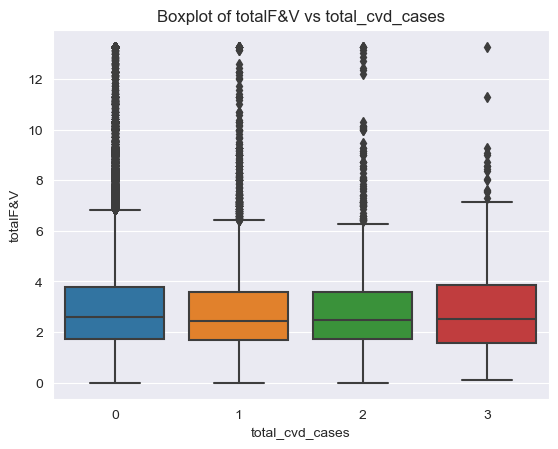

In [35]:
sns.boxplot(x='total_cvd_cases', y='totalF&V', data=clean_2019)
plt.title(f'Boxplot of totalF&V vs total_cvd_cases')
plt.show()

In [36]:
#Get totalCVD's of those that consume => 5 F&V daily
totalcvd_great5 = clean_2019['total_cvd_cases'][clean_2019['totalF&V'] >= 5]

#Get totalCVD's of those that consume < 5 F&V fruits daily
totalcvd_less5 = clean_2019['total_cvd_cases'][clean_2019['totalF&V']< 5]

In [37]:
t_statistic, two_tail_p_value  = stats.ttest_ind(totalcvd_less5,totalcvd_great5, alternative= 'greater')

# Interpret for a one-sided test
one_tail_p_value = two_tail_p_value / 2 if t_statistic > 0 else 1

print(f'p-value: {one_tail_p_value}')
print(f't-stat: {t_statistic}')
      
# Decision
alpha = 0.05  # For example
if one_tail_p_value < alpha:
    print("Reject the null hypothesis")
    print("""Conclusion: mean total CVD cases for those who eat less than 5 servings of F&V is greater 
            than mean total CVD cases for those who eat 5 or more servings of F&V""")
else:
    print("Fail to reject the null hypothesis ")
    print("""Conclusion: no sufficient evidence that mean total CVD cases for those who eat less than 5 servings of F&V is greater 
            than mean total CVD cases for those who eat 5 or more servings of F&V""")
    
categorize_significance(one_tail_p_value)

p-value: 1.2869070873358347e-06
t-stat: 4.558976118614047
Reject the null hypothesis
Conclusion: mean total CVD cases for those who eat less than 5 servings of F&V is greater 
            than mean total CVD cases for those who eat 5 or more servings of F&V


'Highly significant'

### Analysis of the Independent T-test

- **Null Hypothesis (H₀)**: Mean total CVD cases for those who eat less than 5 servings of F&V ≤ mean total CVD cases for those who eat 5 or more servings of F&V.

- **Alternative Hypothesis (H₁)**: Mean total CVD cases for those who eat less than 5 servings of F&V > mean total CVD cases for those who eat 5 or more servings of F&V.

#### confidence interval = 95%

- pvalue < 0.05(alpha) ; this indicates that we reject the null hypothesis
- pvalue < 0.01 this also shows that the results are highly statistically significant

### #2 How does socioeconomic status, emphasizing racial and ethnic backgrounds, influence healthcare access and overall health outcomes?

We will first compare the likeliness that the individual will forgo medical care due to costs based on race and also based on Age group


Columns of Interest:
Dependent Variable
- MEDCOST1 - (response for forgoing medical care due to cost)

Independent Variables
- _HLTHPLN (Healthplan)
- _RACE (race category)
- _SEX (sex category)
- _INCOMEG (income category)
- _EDUCAG (level of education)
- _AGE65YR (2 level age category)

In [38]:
#Table with each category of interest and the corresponding %YES and %NO MEDCOST Response.
df = clean_2019

# Create a function to calculate the percentages
def calculate_percentages(column_name, category):
    total = len(df[df[column_name] == category])
    yes_count = len(df[(df['MEDCOST1'] == 'yes') & (df[column_name] == category)])
    no_count = len(df[(df['MEDCOST1'] == 'no') & (df[column_name] == category)])
    return f"{(yes_count/total)*100:.2f}%", f"{(no_count/total)*100:.2f}%"

# Creating the result table
result = {
    'Variables': [],
    'Category': [],
    'MEDCOST YES %': [],
    'MEDCOST NO %': []
}

# Populate the result table
for col in ['_RACE', '_SEX', '_INCOMG1', '_EDUCAG', '_AGE65YR','MARITAL','EMPLOY1']:
    for category in df[col].unique():
        yes_percent, no_percent = calculate_percentages(col, category)
        result['Variables'].append(col)
        result['Category'].append(category)
        result['MEDCOST YES %'].append(yes_percent)
        result['MEDCOST NO %'].append(no_percent)
        
result_df = pd.DataFrame(result)
result_df['Variables'] = result_df.apply(lambda x: '' if x['Variables'] in result_df['Variables'].iloc[:x.name].values else x['Variables'], axis=1)


# Convert 'MEDCOST YES %' from strings to floats for comparisons
result_df['MEDCOST YES %'] = result_df['MEDCOST YES %'].str.rstrip('%').astype('float')

result_df


,Variables,Category,MEDCOST YES %,MEDCOST NO %
0,_RACE,white,9.98,90.02%
1,,hispanic,19.32,80.68%
2,,asian,10.00,90.00%
3,,other race only,18.20,81.80%
4,,black,16.12,83.88%
5,,multiracial,19.58,80.42%
6,,native american,16.29,83.71%
7,,native hawaiian/pacific islander,16.48,83.52%
8,_SEX,male,10.37,89.63%
9,,female,13.58,86.42%


#### Conclusion:
- Rates were highest for those who responded as being out of work for less than a year and more.
- Individuals with no education had a rate of about 22%
- Those will an income of <15k and between 15k-25k also shows percentages as high as 22% 
- - Overall, about 14% of adults between the ages 18 to 64 reported a time when they did not seek health care services because of cost in the past 12 months (forgone medical care).



In [39]:
#Exploring the population of people who have healthcare plans Based on State in 2019 data 

In [40]:
clean_2019['_HLTHPLN'].value_counts()

_HLTHPLN
yes    76134
no      7532
Name: count, dtype: int64

In [41]:
clean_2019[cat_cols]

,DISPCODE,SEXVAR,GENHLTH,_HLTHPLN,MEDCOST1,CHECKUP1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,...,_RFBMI5,_EDUCAG,_INCOMG1,_SMOKER3,_RFSMOK3,_RFBING5,_RFDRHV7,_TOTINDA,_AIDTST4,STATE
0,1200,male,excellent,yes,no,1 year,no,no,no,no,...,yes,Attended_Col,>50k,former,no,no,no,yes,no,South Dakota
1,1200,male,good,no,no,5 years,no,no,no,no,...,yes,College_grad,>50k,never,no,yes,no,yes,no,South Dakota
2,1200,male,good,no,yes,5 years,no,no,no,no,...,yes,College_grad,<15k,never,no,no,no,yes,no,South Dakota
3,1100,male,fair,yes,no,5 years,no,no,no,no,...,yes,College_grad,>50k,never,no,yes,no,yes,no,South Dakota
4,1100,male,good,yes,no,1 year,no,no,no,no,...,yes,College_grad,>50k,current-somedays,yes,yes,no,no,no,South Dakota
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83661,1100,female,fair,yes,no,1 year,no,no,yes,no,...,yes,College_grad,>50k,never,no,no,no,no,yes,Pennsylvania
83662,1100,female,very good,yes,no,1 year,no,no,no,no,...,yes,Attended_Col,35k-50k,never,no,yes,no,yes,no,Pennsylvania
83663,1100,female,excellent,yes,no,1 year,no,no,no,no,...,no,Attended_Col,35k-50k,never,no,yes,no,yes,no,Pennsylvania
83664,1100,female,good,yes,no,5 years,no,no,no,no,...,yes,College_grad,35k-50k,current-everyday,yes,no,no,yes,yes,Pennsylvania


In [42]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [43]:
init_notebook_mode(connected=True) 

In [44]:
# Convert full state names to abbreviations
clean_2019['STATE_CODE'] = clean_2019['STATE'].apply(lambda x: us.states.lookup(x).abbr)

# Aggregate the data by state and health plan response
healthplan_counts = clean_2019.groupby(['STATE_CODE', '_HLTHPLN']).size().unstack(fill_value=0)

In [45]:
# Calculate the percentage of 'yes' and 'no' responses for each state
healthplan_counts['YES_PERCENT'] = (healthplan_counts['yes'] / (healthplan_counts['yes'] + healthplan_counts['no'])) * 100
healthplan_counts['NO_PERCENT'] = (healthplan_counts['no'] / (healthplan_counts['yes'] + healthplan_counts['no'])) * 100

# Function to create a choropleth data layer
def create_choropleth(z_values, title):
    return go.Choropleth(
        colorscale='YlOrBr',
        locations=healthplan_counts.index,
        z=z_values,
        locationmode='USA-states',
        text=healthplan_counts.index,
        marker=dict(line=dict(color='rgb(12,12,12)', width=2)),
        colorbar={'title': title}
    )

In [46]:
# Create two data layers for 'yes' and 'no' percentages
yes_data = create_choropleth(healthplan_counts['YES_PERCENT'], "Percentage with Health Plan (Yes)")
no_data = create_choropleth(healthplan_counts['NO_PERCENT'], "Percentage without Health Plan (No)")

# Initial layout configuration
layout = dict(
    geo=dict(scope='usa'),
    updatemenus=[{
        'buttons': [
            {'label': 'Yes Percentage',
             'method': 'update',
             'args': [{'visible': [True, False]},
                      {'title': 'Percentage with Health Plan'}]},
            {'label': 'No Percentage',
             'method': 'update',
             'args': [{'visible': [False, True]},
                      {'title': 'Percentage without Health Plan'}]},
        ],
        'direction': 'down',
        'showactive': True,
    }],
    title='Percentage with and without Health Plan'
)

# Create figure with both data layers
fig = go.Figure(data=[yes_data, no_data], layout=layout)

# Initially, show only the 'yes' percentage map
fig.data[1].visible = False

# Display the figure
fig.show()

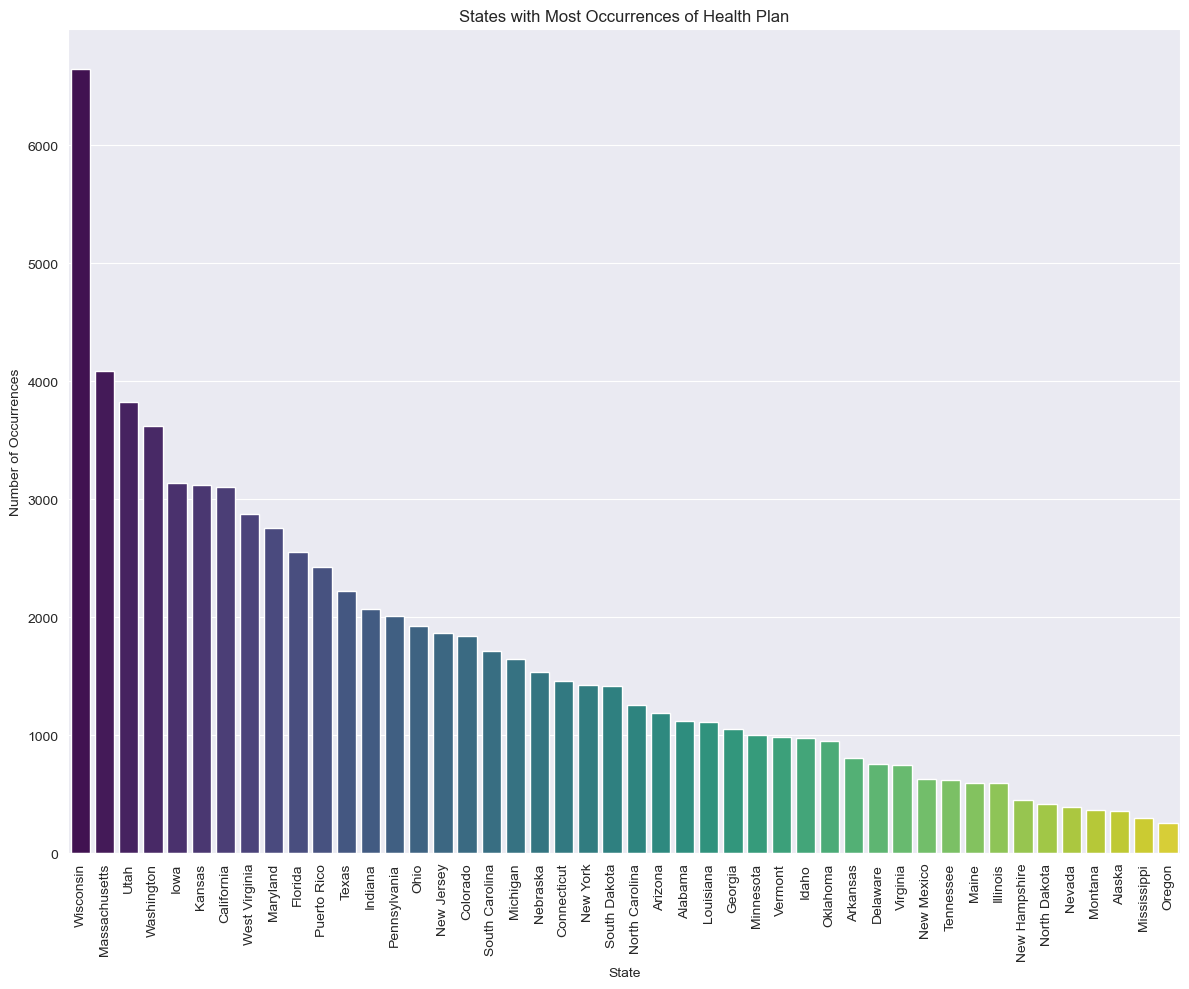

In [47]:
#States with most occurences of healthPlan
state_yes = clean_2019[clean_2019['_HLTHPLN'] == 'yes']['STATE']

# Create a count plot with ordered counts
state_counts = state_yes.value_counts().sort_values(ascending=False)

# Make a vertical bar plot
plt.figure(figsize=(12, 10))  # Adjust the size as needed
barplot = sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Number of Occurrences')
plt.title('States with Most Occurrences of Health Plan')

# Set x-axis labels to be vertical
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)

# Optimize space for readability
plt.tight_layout()

# Show the plot
plt.show()

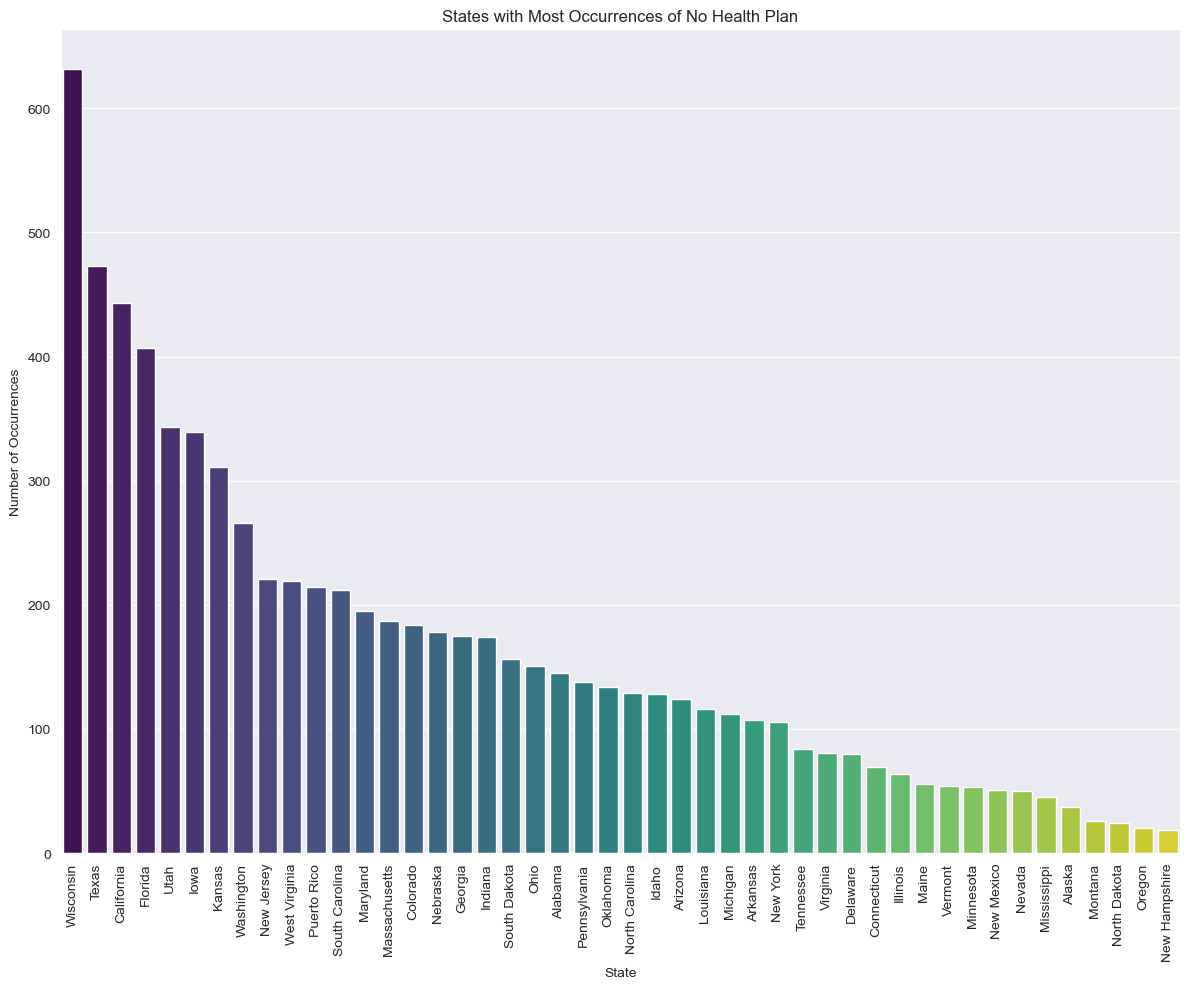

In [48]:
#States with most occurences of healthPlan
state_no = clean_2019[clean_2019['_HLTHPLN'] == 'no']['STATE']

# Create a count plot with ordered counts
state_counts = state_no.value_counts().sort_values(ascending=False)

# Make a vertical bar plot
plt.figure(figsize=(12, 10))  # Adjust the size as needed
barplot = sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Number of Occurrences')
plt.title('States with Most Occurrences of No Health Plan')

# Set x-axis labels to be vertical
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)

# Optimize space for readability
plt.tight_layout()

# Show the plot
plt.show()

In [49]:
#Conclusion:


---

---

### #3 How does regular physical exercise influence tangible health outcomes, such as the risk of developing cancer, and mental health outcomes, including the likelihood of being diagnosed with depression?

**Exploring the Association Between Exercise and Chronic Diseases Using Chi Squared Test For Association Analysis:**

**Variable of Interest:**

**'EXERANY2'**: 
During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?


**NB**
The Chi-Squared Test is a non parametric test for comparing two categorical variables in a large dataset to see if any association exists but does not imply any causation.This is why it was an appropriate use case.

#### Column Descriptions

- **`EXERANY2` field, indicating whether the respondent exercised in the past month besides their regular job 

- **`CVDINFR4` field, indicating whether the respondent ever had a heart attack as diagnosed by a health professional 

- **`CVDSTRK3` field, indicating whether the respondent ever had a stroke as diagnosed by a health professional

- **`CVDCRHD4` field, indicating whether the respondent ever had coronary heart disease.

- **`CHCOCNCR` field, indicating whether the respondent ever had any form of cancer, excluding skin cancer.

- **`ADDEPEV3` field, indicating whether the respondent ever had a depressive disorder as diagnosed by a health professional 

- **`DIABETE4` field, indicating whether the respondent ever had diabetes.


In [50]:
# Encode the 'yes'/'no' responses to numeric 0 and 1 in order for run Chi-squared test

clean_2019['EXERANY2_numeric'] = clean_2019['EXERANY2'].map({'no': 0, 'yes': 1})
#heartattack
clean_2019['CVDINFR4_numeric'] = clean_2019['CVDINFR4'].map({'no': 0, 'yes': 1})
#stroke
clean_2019['CVDSTRK3_numeric'] = clean_2019['CVDSTRK3'].map({'no': 0, 'yes': 1})
#Coronary heart disease
clean_2019['CVDCRHD4_numeric'] = clean_2019['CVDCRHD4'].map({'no': 0, 'yes': 1})
#Other cancers excluding skin cancer
clean_2019['CHCOCNCR_numeric'] = clean_2019['CHCOCNCR'].map({'no': 0, 'yes': 1})
#Depression
clean_2019['ADDEPEV3_numeric'] = clean_2019['ADDEPEV3'].map({'no': 0, 'yes': 1})
#Diabetes
clean_2019['DIABETE4_numeric'] = clean_2019['DIABETE4'].map({'no': 0, 'yes': 1})



# List of binary variables representing health outcomes
health_outcomes = ['DIABETE4_numeric','CHCOCNCR_numeric', 'CVDCRHD4_numeric', 'CVDSTRK3_numeric', 'CVDINFR4_numeric','ADDEPEV3_numeric']

# Initialize an empty DataFrame to store Chi-squared test results
chi2_results = pd.DataFrame(columns=['Health_Outcome', 'Chi2_Stat', 'P_Value'])

# Perform Chi-squared test for each health outcome
for index, outcome in enumerate(health_outcomes):
    contingency_table = pd.crosstab(clean_2019['EXERANY2_numeric'], clean_2019[outcome])
    
    chi2_stat, p_value, dof, _ = chi2_contingency(contingency_table)
    
    # Add the results to the DataFrame using .loc
    chi2_results.loc[index] = [outcome, chi2_stat, p_value]
    
    # Print the contingency table and test results
    print(f"Contingency table for {outcome}:\n", contingency_table)
    print(f"Chi-squared stat: {chi2_stat}, p-value: {p_value}\n")
    print('-----------------------------------------------------')


Contingency table for DIABETE4_numeric:
 DIABETE4_numeric      0     1
EXERANY2_numeric             
0                 15121  4025
1                 56835  7685
Chi-squared stat: 1017.5763997526158, p-value: 2.7153332344971004e-223

-----------------------------------------------------
Contingency table for CHCOCNCR_numeric:
 CHCOCNCR_numeric      0     1
EXERANY2_numeric             
0                 17358  1788
1                 59801  4719
Chi-squared stat: 84.10942142696405, p-value: 4.681345072287505e-20

-----------------------------------------------------
Contingency table for CVDCRHD4_numeric:
 CVDCRHD4_numeric      0     1
EXERANY2_numeric             
0                 17968  1178
1                 62260  2260
Chi-squared stat: 262.4509283593462, p-value: 5.015124698613383e-59

-----------------------------------------------------
Contingency table for CVDSTRK3_numeric:
 CVDSTRK3_numeric      0     1
EXERANY2_numeric             
0                 18150   996
1             

In [51]:
chi2_results

,Health_Outcome,Chi2_Stat,P_Value
0,DIABETE4_numeric,1017.576400,2.715333e-223
1,CHCOCNCR_numeric,84.109421,4.681345e-20
2,CVDCRHD4_numeric,262.450928,5.015125e-59
3,CVDSTRK3_numeric,307.344747,8.272974e-69
4,CVDINFR4_numeric,363.707922,4.387386e-81
5,ADDEPEV3_numeric,477.137814,8.965053e-106


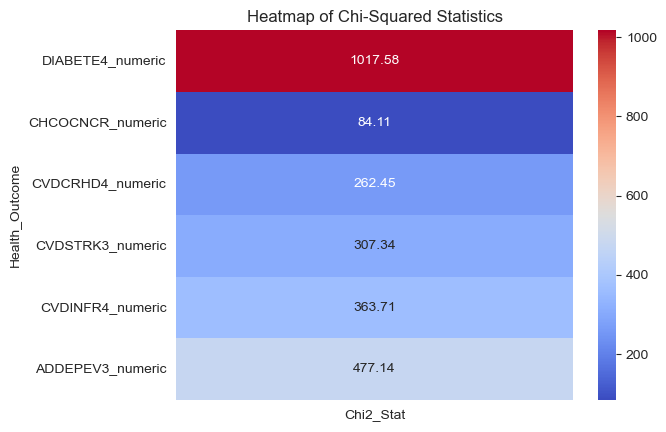

In [52]:
# Visualization
sns.heatmap(chi2_results.set_index('Health_Outcome')[['Chi2_Stat']], annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Chi-Squared Statistics')
plt.show()

### Conclusion:

The chi-squared tests demonstrate a statistically significant association between regular exercise (EXERANY2) and reduced reports of chronic diseases, including diabetes, cancer, coronary heart disease, strokes, heart attacks, and depression. The extremely low p-values reinforce the strength of this association. However, it's critical to note that these results imply correlation, not causation; additional research is needed to determine if and how exercise directly influences the prevalence of these conditions.

---

---

### #4 Is there a correlation between Chronic conditions and individuals self-assessed health status?

**Exploring the Association Between Self-Assesed health Status and Chronic Diseases Using Chi Squared Test for Association Analysis (as all columns of interest are categorical) :**

**Variable of Interest:**

**'_RFHLTH'**: 

Percieved good or bad health

In [53]:
# Encode the 'yes'/'no' responses to numeric 0 and 1 in order for run Chi-squared test
clean_2019['_RFHLTH_numeric'] = clean_2019['_RFHLTH'].map({'fair or poor health': 0, 'Good or Better Health': 1})
#heartattack
clean_2019['CVDINFR4_numeric'] = clean_2019['CVDINFR4'].map({'no': 0, 'yes': 1})
#stroke
clean_2019['CVDSTRK3_numeric'] = clean_2019['CVDSTRK3'].map({'no': 0, 'yes': 1})
#Coronary heart disease
clean_2019['CVDCRHD4_numeric'] = clean_2019['CVDCRHD4'].map({'no': 0, 'yes': 1})
#Other cancers excluding skin cancer
clean_2019['CHCOCNCR_numeric'] = clean_2019['CHCOCNCR'].map({'no': 0, 'yes': 1})
#Depression
clean_2019['ADDEPEV3_numeric'] = clean_2019['ADDEPEV3'].map({'no': 0, 'yes': 1})
#Diabetes
clean_2019['DIABETE4_numeric'] = clean_2019['DIABETE4'].map({'no': 0, 'yes': 1})


clean_2019['_RFHLTH']
# List of binary variables representing health outcomes
health_outcomes = ['DIABETE4_numeric','CHCOCNCR_numeric', 'CVDCRHD4_numeric', 'CVDSTRK3_numeric', 'CVDINFR4_numeric','ADDEPEV3_numeric']

# Initialize an empty DataFrame to store Chi-squared test results
chi2_results = pd.DataFrame(columns=['Health_Outcome', 'Chi2_Stat', 'P_Value'])

# Perform Chi-squared test for each health outcome
for index, outcome in enumerate(health_outcomes):
    contingency_table = pd.crosstab(clean_2019['_RFHLTH_numeric'], clean_2019[outcome])
    
    chi2_stat, p_value, dof, _ = chi2_contingency(contingency_table)
    
    # Add the results to the DataFrame using .loc
    chi2_results.loc[index] = [outcome, chi2_stat, p_value]
    
    # Print the contingency table and test results
    print(f"Contingency table for {outcome}:\n", contingency_table)
    print(f"Chi-squared stat: {chi2_stat}, p-value: {p_value}\n")
    print('-----------------------------------------------------')


Contingency table for DIABETE4_numeric:
 DIABETE4_numeric      0     1
_RFHLTH_numeric              
1                 62994  7376
0                  8962  4334
Chi-squared stat: 4541.647914858662, p-value: 0.0

-----------------------------------------------------
Contingency table for CHCOCNCR_numeric:
 CHCOCNCR_numeric      0     1
_RFHLTH_numeric              
1                 65882  4488
0                 11277  2019
Chi-squared stat: 1208.1885584227828, p-value: 1.0132158452705736e-264

-----------------------------------------------------
Contingency table for CVDCRHD4_numeric:
 CVDCRHD4_numeric      0     1
_RFHLTH_numeric              
1                 68566  1804
0                 11662  1634
Chi-squared stat: 2682.12245954855, p-value: 0.0

-----------------------------------------------------
Contingency table for CVDSTRK3_numeric:
 CVDSTRK3_numeric      0     1
_RFHLTH_numeric              
1                 68975  1395
0                 11987  1309
Chi-squared stat: 220

In [54]:
chi2_results

,Health_Outcome,Chi2_Stat,P_Value
0,DIABETE4_numeric,4541.647915,0.000000e+00
1,CHCOCNCR_numeric,1208.188558,1.013216e-264
2,CVDCRHD4_numeric,2682.122460,0.000000e+00
3,CVDSTRK3_numeric,2208.094229,0.000000e+00
4,CVDINFR4_numeric,2545.565183,0.000000e+00
5,ADDEPEV3_numeric,3353.992612,0.000000e+00


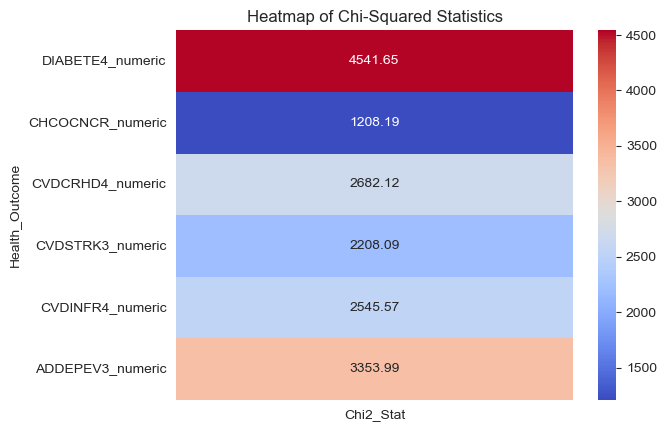

In [55]:
# Visualization using seaborn heatmap to show chi2 statistic btw each chronic disease and ones percieved health.
sns.heatmap(chi2_results.set_index('Health_Outcome')[['Chi2_Stat']], annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Chi-Squared Statistics')
plt.show()

### Conclusion:

The provided contingency tables and corresponding Chi-squared statistics indicate an exceptionally strong association between the perceived health status (_RFHLTH_numeric) and various health outcomes. For all cases—diabetes, cancer, coronary heart disease, stroke, heart failure, and depression—the p-values are effectively zero, which in statistical terms suggests an almost certain rejection of the null hypothesis that there is no association.

The disproportion between the number of individuals with good perceived health (1) without these conditions and those with poor perceived health (0) having the conditions further reinforces the significance of the associations. The high Chi-squared statistics accentuate the robustness of these associations across all conditions examined.

These results imply that perceived health status has a strong correlation with actual health conditions, such as diabetes, cancer, and heart-related ailments. However, it’s crucial to remember that correlation does not imply causation, and further studies would be necessary to explore the causal relationships. Nonetheless, these findings highlight the potential of perceived health status as an indicator for actual health outcomes in a population.

----

----

---- THE END ----